# Part 1

#### 2.1  Part 1: Data Exploration [15 Points]

This part of the homework is designed to help you familiarize yourself with the dataset andthe context in which it was collected.  The insights from this part of the homework can helpyou  in  building  the  prediction  and  recommendation  models  for  the  Parts  2  and  3  of  thehomework.

a).  Read Fisman et al. (2006) closely to understand the context of the data collection.
> *Main Idea*     
The article attempts to find out what drive’s male/female decision making when it comes to partners. Given a great majority of people are in a relationship/or looking for one, these findings might help clarify some of the mystics behind "love." Of course, things might have changed since the original publishing date. Nevertheless, it might still be relevant/ interesting. Below are some of the claims (based on data):
    - Women put greater weight on the intelligence and the race of partner (stronger preference for men of their own
    ethnicity), while men respond more to physical attractiveness. 
    - Men do not value women’s intelligence or ambition when it exceeds their own. 
    - Women exhibit a preference for men who grew up in affluent neighborhoods. 
    - Male selectivity is invariant to group size, while female selectivity is strongly increasing in group size.
*Social theory Explanations*                                                                                                 
Why do women want an intelligent/well-off man?
    - Need a provider for the family
Why do men want a beautiful woman?
    - Healthy kids 
*Possible Bias*                                                                                                              
Subjects of these experiment were confined to graduate student/professional.Hence, results might be a bit biased towards more educated people. 


b).  ReadSpeedDatingDataKey.pdfto familiarize yourself with the various variable definitions.
>  Read in Canvas. There are quite a few variables  (61?) that deal with subject to partner rating & their own honest evaluations. 

c).  Perform basic exploratory data analysis, for example

- Visualize and describe some or all of the variables.  You might choose to graph combinations of variables.  You might also choose to graph variables in isolation.
- Perform correlation analysis.
- Deal with missing values and outliers.

This part of the assignment has a written conclusion.  In the written conclusion please detail how missing values and outliers were handled and justify your decisions made.  Consider how your handling alters the distribution of the dataset. 

The  main  deliverable  for  this  part  of  the  homework  is  a  step-by-step  exploration  of  data along with text describing your conclusions in your Jupyter Notebook.  The analysis pipeline described above is just a suggestion and you are welcome to add more or fewer steps as long as it helps you carefully analyze the properties of the dataset.

---
<center> <b> <i> <u>Written Conclusion </u><i></b> </center>

**EDA**

> The basic philosophy behind the EDA process was to keep as many observations as possible, while at the same time ensuring data quality and dropping/removing observations that seemed erroneous. 
The very first thing, was to check out the columns for which there were present null values. These ones , were the focus of my investigation, for by checking the presence of null values I was able to determine if some observation were salvageable by adapting imputing, or useless. 
Age, Age_o follows a normal distribution with mean 26  & Std 3.84. Hence, I simply replaced the missing values with random sampling from similar distribution [graph 1,2,3,4]. 
Race, Race_o had missing values as well. Unfortunately, I was not able to salvage these ones, for no clear way to make up for unknown race. It is noticeable that Caucasians are overly represented, whereas Blacks & Natives are underrepresented [graph 5]. 
For the different attributes, as mentioned in the SpeedDatingDataKey, must be with range 0-100). As a result, I simply replaced all Nan’s with 0 & subsequently checked that their sum did add up to 100. I update the data all observations that did not meet this criterion with the mean & maked negative values equal to zero. It does not make sense to have data that are over or below 100 given they are outside of the rules set by the researchers. 
The same was done for attributes with the range 0-10. 
The variables met_o, met, both had null values, but given its weak significance in relation to our problem, I simply replaced all null values with 2 (code for never met) given that this was the majority of the met/met_o outcome. The reason for such choice was to avoid losing data based on an unimportant column. 
Also, career,career_c where updated so as to have “other” in a case where there were missing values.
The Gaming variable had values above 10 (maximum allowed). I simply replaced all values above 10 with 10. 

**Interesting trends**
>Both genders seem to be equally represented [graph 6]
Males & Females both seem to have the same goal for attending the speed dating (fun & meet new people), with the exception that men are more likely to be interested in dates than women [graph 7].
In order to answer the question: “Do women/men prefer intelligent, fun, sincere, or attractive partners?” I took the relative success rate of man  (success matches/ total matches) and compared the average attribute scores of a yes match vs the attribute scores of a no match. The scatter plots of these ones show interesting patterns such as:  men are more likely to accept a woman if she rates highly attractive; women/men who are more sincere tend to be more accepted [graph 8]
Correlation 

**Correlation**
>The correlation matrix is quite big & challenging to understand. As a result, I simply extracted the strongest correlations (>abs(.45)). The findings make a lot of sense. For example, people who like museum also like art; people who like concerts also like music; sincerity is correlated with intelligence; race is correlated with religion; exercise is correlated with sports. 


In [451]:
import pandas as pd
import numpy as np
import random
random.seed(671)

trainML = pd.read_csv('trainML.csv')
trainRec= pd.read_csv('trainRec.csv')
testML = pd.read_csv('testML.csv')
testRec= pd.read_csv('testRec.csv')

#Peak of datasets
print(trainML.head())
print(trainRec.head())
print(testML.head())
print(testRec.head())

   gender  match  samerace  age_o  race_o  pf_o_att  pf_o_sin  pf_o_int  \
0       0      0         0   29.0     3.0      20.0      25.0      15.0   
1       0      0         0   22.0     6.0      20.0      15.0      20.0   
2       0      0         0   27.0     1.0      21.0      17.0      22.0   
3       0      1         1   28.0     2.0      50.0      10.0      30.0   
4       0      1         1   26.0     2.0      25.0      10.0      20.0   

   pf_o_fun  pf_o_amb  pf_o_sha  attr_o  sinc_o  intel_o  fun_o  met_o   age  \
0      15.0      53.0      20.0     7.0     6.0      6.0    7.0    2.0  23.0   
1      20.0       5.0      10.0     8.0     8.0      7.0    7.0    2.0  23.0   
2      20.0       8.0      13.0     6.0     4.0      5.0    6.0    2.0  23.0   
3      10.0       0.0       0.0     7.0     5.0      5.0    7.0    2.0  23.0   
4      20.0      15.0      10.0     8.0     6.0      7.0    7.0    2.0  23.0   

         field  race  imprace  imprelig     from  goal  date  go_out

In [452]:
(trainML.columns)

Index(['gender', 'match', 'samerace', 'age_o', 'race_o', 'pf_o_att',
       'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'attr_o',
       'sinc_o', 'intel_o', 'fun_o', 'met_o', 'age', 'field', 'race',
       'imprace', 'imprelig', 'from', 'goal', 'date', 'go_out', 'career',
       'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga', 'attr1_1', 'sinc1_1',
       'intel1_1', 'fun1_1', 'amb1_1', 'attr3_1', 'sinc3_1', 'fun3_1',
       'intel3_1', 'attr', 'sinc', 'intel', 'fun', 'met', 'iid', 'pid',
       'shar1_1'],
      dtype='object')

In [453]:
trainML.head()

,gender,match,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,attr_o,sinc_o,intel_o,fun_o,met_o,age,field,race,imprace,imprelig,from,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,attr3_1,sinc3_1,fun3_1,intel3_1,attr,sinc,intel,fun,met,iid,pid,shar1_1
0,0,0,0,29.0,3.0,20.0,25.0,15.0,15.0,53.0,20.0,7.0,6.0,6.0,7.0,2.0,23.0,social work,2.0,10.0,9.0,Florida,1.0,3.0,1.0,social worker,9.0,2.0,1.0,10.0,10.0,5.0,5.0,2.0,1.0,7.0,6.0,8.0,8.0,7.0,6.0,9.0,10.0,4.0,17.0,18.0,18.0,15.0,17.0,10.0,10.0,9.0,8.0,2.0,6.0,2.0,3.0,2.0,355,150,15.0
1,0,0,0,22.0,6.0,20.0,15.0,20.0,20.0,5.0,10.0,8.0,8.0,7.0,7.0,2.0,23.0,social work,2.0,10.0,9.0,Florida,1.0,3.0,1.0,social worker,9.0,2.0,1.0,10.0,10.0,5.0,5.0,2.0,1.0,7.0,6.0,8.0,8.0,7.0,6.0,9.0,10.0,4.0,17.0,18.0,18.0,15.0,17.0,10.0,10.0,9.0,8.0,3.0,9.0,9.0,7.0,2.0,355,214,15.0
2,0,0,0,27.0,1.0,21.0,17.0,22.0,20.0,8.0,13.0,6.0,4.0,5.0,6.0,2.0,23.0,social work,2.0,10.0,9.0,Florida,1.0,3.0,1.0,social worker,9.0,2.0,1.0,10.0,10.0,5.0,5.0,2.0,1.0,7.0,6.0,8.0,8.0,7.0,6.0,9.0,10.0,4.0,17.0,18.0,18.0,15.0,17.0,10.0,10.0,9.0,8.0,3.0,7.0,5.0,3.0,NaN,355,515,15.0
3,0,1,1,28.0,2.0,50.0,10.0,30.0,10.0,0.0,0.0,7.0,5.0,5.0,7.0,2.0,23.0,social work,2.0,10.0,9.0,Florida,1.0,3.0,1.0,social worker,9.0,2.0,1.0,10.0,10.0,5.0,5.0,2.0,1.0,7.0,6.0,8.0,8.0,7.0,6.0,9.0,10.0,4.0,17.0,18.0,18.0,15.0,17.0,10.0,10.0,9.0,8.0,5.0,10.0,8.0,5.0,2.0,355,528,15.0
4,0,1,1,26.0,2.0,25.0,10.0,20.0,20.0,15.0,10.0,8.0,6.0,7.0,7.0,2.0,23.0,social work,2.0,10.0,9.0,Florida,1.0,3.0,1.0,social worker,9.0,2.0,1.0,10.0,10.0,5.0,5.0,2.0,1.0,7.0,6.0,8.0,8.0,7.0,6.0,9.0,10.0,4.0,17.0,18.0,18.0,15.0,17.0,10.0,10.0,9.0,8.0,4.0,7.0,9.0,9.0,2.0,355,291,15.0


In [454]:
#[attempt to preserve as much data as possible by performing imputation techiniques before discarding observations]
#Find out what columns have null values 
null_val = trainML.isnull().sum()
col_names = trainML.columns
my_list = []
for x in range(len(null_val)):
    if (null_val[x] >1):
        temp= (col_names[x],null_val[x])
        my_list.append(temp)
print((my_list))

[('age_o', 67), ('race_o', 58), ('pf_o_att', 58), ('pf_o_sin', 58), ('pf_o_int', 58), ('pf_o_fun', 67), ('pf_o_amb', 76), ('pf_o_sha', 76), ('attr_o', 97), ('sinc_o', 138), ('intel_o', 142), ('fun_o', 161), ('met_o', 168), ('age', 67), ('field', 58), ('race', 58), ('imprace', 58), ('imprelig', 58), ('from', 58), ('goal', 58), ('date', 58), ('go_out', 58), ('career', 68), ('career_c', 68), ('sports', 58), ('tvsports', 58), ('exercise', 58), ('dining', 58), ('museums', 58), ('art', 58), ('hiking', 58), ('gaming', 58), ('clubbing', 58), ('reading', 58), ('tv', 58), ('theater', 58), ('movies', 58), ('concerts', 58), ('music', 58), ('shopping', 58), ('yoga', 58), ('attr1_1', 58), ('sinc1_1', 58), ('intel1_1', 58), ('fun1_1', 67), ('amb1_1', 76), ('attr3_1', 58), ('sinc3_1', 58), ('fun3_1', 58), ('intel3_1', 58), ('attr', 97), ('sinc', 138), ('intel', 142), ('fun', 161), ('met', 168), ('shar1_1', 76)]


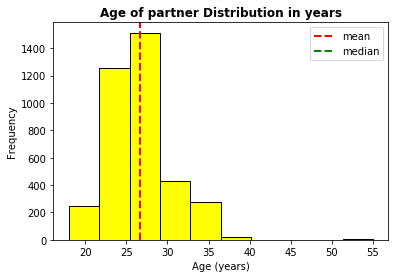

Mean:  26.67281475541299
Sd:  3.8468240670020317


In [455]:
#Check out age distribution & see if can replace null values  with values from a similar distribution 
import matplotlib.pyplot as plt
age_of_partner = trainML['age_o']

_= plt.hist(age_of_partner,  histtype='bar', align='mid', orientation='vertical', color='yellow', label=None, edgecolor= 'k')
_=plt.xlabel('Age (years)')
_=plt.ylabel('Frequency')
_=plt.title('Age of partner Distribution in years', fontweight='bold')
_= plt.axvline(np.mean(age_of_partner), color='red', linestyle='dashed', linewidth=2, label='mean')
_= plt.axvline(np.median(age_of_partner), color='green', linestyle='dashed', linewidth=2, label='median')
_=plt.legend()
plt.show()
print('Mean: ', np.mean(age_of_partner))
print('Sd: ', np.std(age_of_partner))


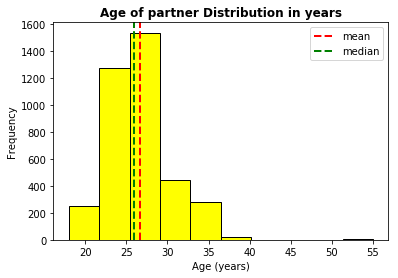

Median:  26.0
Mean:  26.674967221267647
Sd:  3.8422012378275134


In [456]:
#Given age seems to follow a normal distribution with mean 26.67, 
#I will replace the empty values with random numbers  sampled from a N(26.67,3.85)
age_of_partner = trainML['age_o'].to_frame(name='age_o')
#Mean & STD
mu = np.mean(age_of_partner)
sigma = np.std(age_of_partner)
#Fill in nans wirh -1 (so as to recognize these values in if statement & replace them with random Normal value)
age_of_partner= age_of_partner.fillna(-1)

def calculate_age(row):
    i=row['age_o']
    if(i == -1):
        age = np.random.normal(mu, sigma, 1).tolist()[0]
        return age
    else:
        return i

age_of_partner['age_0'] = age_of_partner.apply(calculate_age, axis=1)

_= plt.hist(age_of_partner['age_0'],  histtype='bar', align='mid', orientation='vertical', color='yellow', label=None, edgecolor= 'k')
_=plt.xlabel('Age (years)')
_=plt.ylabel('Frequency')
_=plt.title('Age of partner Distribution in years', fontweight='bold')
_= plt.axvline(np.mean(age_of_partner['age_0']), color='red', linestyle='dashed', linewidth=2, label='mean')
_= plt.axvline(np.median(age_of_partner['age_0']), color='green', linestyle='dashed', linewidth=2, label='median')
_=plt.legend()
plt.show()
print('Median: ', np.median(age_of_partner['age_0']))
print('Mean: ', np.mean(age_of_partner['age_0']))
print('Sd: ', np.std(age_of_partner['age_0']))

#Update Dataset
trainML['age_o'] = age_of_partner['age_0']

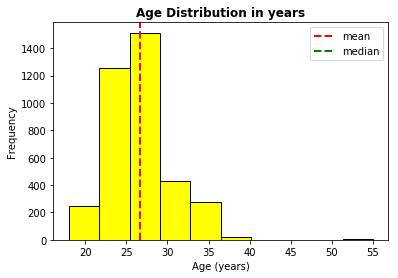

Mean:  26.67281475541299
Sd:  3.846824067002032


In [457]:
##AGE SAME IDEA AS AGE_PARTNER
age = trainML['age']
_= plt.hist(age,  histtype='bar', align='mid', orientation='vertical', color='yellow', label=None, edgecolor= 'k')
_=plt.xlabel('Age (years)')
_=plt.ylabel('Frequency')
_=plt.title('Age Distribution in years', fontweight='bold')
_= plt.axvline(np.mean(age), color='red', linestyle='dashed', linewidth=2, label='mean')
_= plt.axvline(np.median(age), color='green', linestyle='dashed', linewidth=2, label='median')
_=plt.legend()
plt.show()
print('Mean: ', np.mean(age))
print('Sd: ', np.std(age))

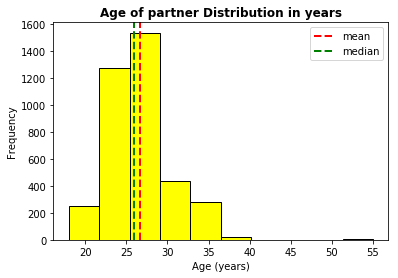

Median:  26.0
Mean:  26.68139826550489
Sd:  3.853665459552453


In [458]:
#Given age seems to follow a normal distribution with mean 26.67, 
#I will replace the empty values with random numbers  sampled from a N(26.67,3.85)
age = trainML['age'].to_frame(name='age')
#Mean & STD
mu = np.mean(age)
sigma = np.std(age)
#Fill in nans wirh -1 (so as to recognize these values in if statement & replace them with random Normal value)
age= age.fillna(-1)

def calculate_age(row):
    i=row['age']
    if(i == -1):
        age = np.random.normal(mu, sigma, 1).tolist()[0]
        return age
    else:
        return i

age['age_0'] = age.apply(calculate_age, axis=1)

_= plt.hist(age['age_0'],  histtype='bar', align='mid', orientation='vertical', color='yellow', label=None, edgecolor= 'k')
_=plt.xlabel('Age (years)')
_=plt.ylabel('Frequency')
_=plt.title('Age of partner Distribution in years', fontweight='bold')
_= plt.axvline(np.mean(age['age_0']), color='red', linestyle='dashed', linewidth=2, label='mean')
_= plt.axvline(np.median(age['age_0']), color='green', linestyle='dashed', linewidth=2, label='median')
_=plt.legend()
plt.show()
print('Median: ', np.median(age['age_0']))
print('Mean: ', np.mean(age['age_0']))
print('Sd: ', np.std(age['age_0']))

#Update Dataset
trainML['age'] = age['age_0']

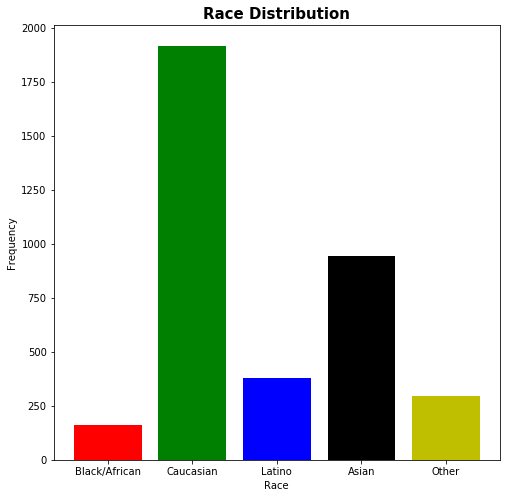

In [459]:
#There seem to be nan's in race. In this case can't really do much but discaard these values
#Race, is not that well represented  in all categories. The individuals are predominantly Whites/Asians with 
#Latinos & Others being moderately represetned. Finally there are few Blacks & zero Natives. 
from collections import Counter
import collections
#Drop nan's
trainML= trainML.dropna(subset = ['race_o', 'race'])
#Dict of counts in each sepcific race category
count= (Counter(list(trainML['race'])))
count=collections.OrderedDict(sorted(count.items()))

x= ['Black/African','Caucasian','Latino','Asian','Other']
y= list(count.values())

#Plot
fig, ax = plt.subplots(figsize=(8,8))
ax.bar(x,y,color = 'rgbkymc')
ax.set_title('Race Distribution' , weight= 'bold', fontsize = 15)
ax.set_xlabel("Race")
ax.set_ylabel("Frequency")
plt.show()

In [483]:
#For Attributes, simply replace nan's with zero & ratings > 100 replace scores with mean scores
#Replace NANS WITH ZERO
preferences = ['pf_o_att','pf_o_sin','pf_o_int','pf_o_fun','pf_o_amb','pf_o_sha']
trainML[preferences] = trainML[preferences].fillna(value=0)

#Change negative values to zero
trainML.loc[(trainML.pf_o_att <0),'pf_o_att']= 0
trainML.loc[(trainML.pf_o_sin <0),'pf_o_sin']= 0
trainML.loc[(trainML.pf_o_int <0),'pf_o_int']= 0
trainML.loc[(trainML.pf_o_fun <0),'pf_o_fun']= 0
trainML.loc[(trainML.pf_o_amb <0),'pf_o_amb']= 0
trainML.loc[(trainML.pf_o_sha <0),'pf_o_sha']= 0

for x, y in trainML.iterrows():
    z=y[preferences].sum()
    
    if(z>100.0 or z<0):
        #If total sum of pf attributes > 100, simply replace each value with the mean of that category
        trainML.loc[x,preferences]=[22.378878,17.877468 ,20.403949,17.149483, 10.578815,11.611407]  

In [461]:
#Fill Nan's with -1
preferences = ['attr_o', 'sinc_o','intel_o','fun_o']
trainML[preferences] = trainML[preferences].fillna(value=-1)

#If total sum of  attributes > 10 or < 0 (nans) , simply replace each value with the mean of that category
for x, y in trainML.iterrows():
    for p in preferences:
        z=y[p]
        if((z>10.0) or (z<0)):
            if(p=='attr_o'):  
                trainML.loc[x,[p]]=6.259185
            elif(p=='sinc_o'):
                trainML.loc[x,[p]]=7.237048
            elif(p=='intel_o'):
                trainML.loc[x,[p]]= 7.417251
            elif(p=='fun_o'):
                trainML.loc[x,[p]]= 6.396814

In [468]:
#Career & Career_c
pd.set_option('display.max_columns', None)
trainML.loc[(trainML.career.isnull()),'career']= 'other'
trainML.loc[(trainML.career_c.isnull()),'career_c']= 15

In [484]:
#For Attributes, simply replace nan's with zero & ratings > 100 replace scores with mean scores
#Replace NANS WITH ZERO
subject_pref = ['attr1_1','sinc1_1','intel1_1', 'fun1_1', 'amb1_1','shar1_1']
trainML[subject_pref] = trainML[subject_pref].fillna(value=0)

#Change negative values to zero
trainML.loc[(trainML.attr1_1 <0),'attr1_1']= 0
trainML.loc[(trainML.sinc1_1 <0),'sinc1_1']= 0
trainML.loc[(trainML.fun1_1 <0),'fun1_1']= 0
trainML.loc[(trainML.amb1_1 <0),'amb1_1']= 0
trainML.loc[(trainML.shar1_1 <0),'shar1_1']= 0

for x, y in trainML.iterrows():
    z=y[subject_pref].sum()
    if(z>100.0 or z<0):
        #If total sum of pf attributes > 100, simply replace each value with the mean of that category
        trainML.loc[x,preferences]=[22.444789,17.759456 ,20.432863,17.160741, 10.728585,11.624379]          

In [477]:
a_att= ['attr','sinc','intel','fun'] 
trainML[a_att] = trainML[a_att].fillna(value=-1)

#If total sum of  attributes > 10 or < 0 (nans) , simply replace each value with the mean of that category
for x, y in trainML.iterrows():
    for p in a_att:
        z=y[p]
        if((z>10.0) or (z<0)):
            if(p=='attr'):  
                trainML.loc[x,[p]]=6.259185
            elif(p=='sinc'):
                trainML.loc[x,[p]]=7.237048
            elif(p=='intel'):
                trainML.loc[x,[p]]= 7.417251
            elif(p=='fun'):
                trainML.loc[x,[p]]= 6.396814

In [478]:
# There are a total of 62 null met o, I don't think this variable is terribly important. Hence, I will simply replace the 
#NUll values with impute 
trainML['met_o'].fillna(method='ffill', inplace=True)
trainML['met'].fillna(method='ffill', inplace=True)

#Change 3's to 2 
trainML.loc[(trainML.met_o >2),'met_o']= 2
trainML.loc[(trainML.met >2),'met']= 2

#There seem to be a 3 different level for met (0,1,2). Change 0 to 1 
trainML.loc[(trainML.met <1),'met']= 1

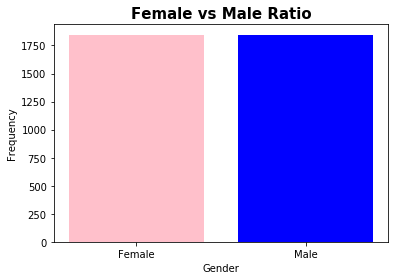

<Figure size 576x576 with 0 Axes>

In [485]:
#Gender Distribution 
female = len(trainML[trainML['gender'] ==0]['gender'])
male = len(trainML[trainML['gender'] ==1]['gender']) 

_=plt.bar(['Female','Male'], [female,male], color=['pink','blue'])
_=plt.title('Female vs Male Ratio', weight= 'bold',fontsize = 15)
_=plt.xlabel("Gender")
_=plt.ylabel("Frequency")
_=plt.figure(figsize=(8,8))

plt.show()

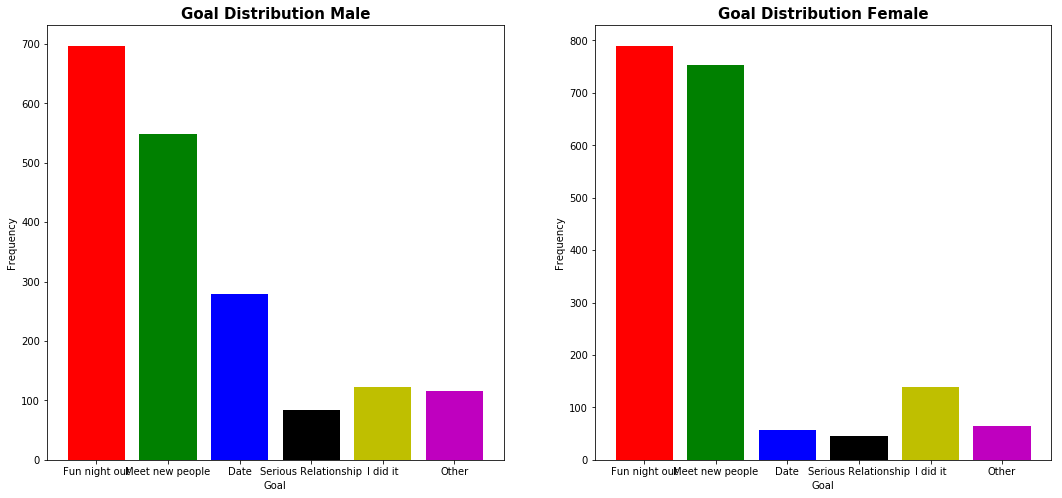

In [486]:
#What is the goal of these people? Do they differ by gender?
goal_male = trainML[trainML['gender'] ==1]['goal']
goal_female = trainML[trainML['gender'] ==0]['goal']

#Dict of counts in each sepcific Goal category
count_male= (Counter(list(goal_male)))
count_male=collections.OrderedDict(sorted(count_male.items()))

count_female= (Counter(list(goal_female)))
count_female=collections.OrderedDict(sorted(count_female.items()))

x_goal= ['Fun night out','Meet new people', 'Date', 'Serious Relationship','I did it','Other']
y_male= list(count_male.values())
y_female = list(count_female.values())

#Plot
#Male
fig, ax = plt.subplots(1,2, figsize=(18,8))
ax[0].bar(x_goal,y_male,color = 'rgbkymc')
ax[0].set_title('Goal Distribution Male' , weight= 'bold', fontsize = 15)
ax[0].set_xlabel("Goal")
ax[0].set_ylabel("Frequency")

#Female
ax[1].bar(x_goal,y_female,color = 'rgbkymc')
ax[1].set_title('Goal Distribution Female' , weight= 'bold', fontsize = 15)
ax[1].set_xlabel("Goal")
ax[1].set_ylabel("Frequency")

plt.show()

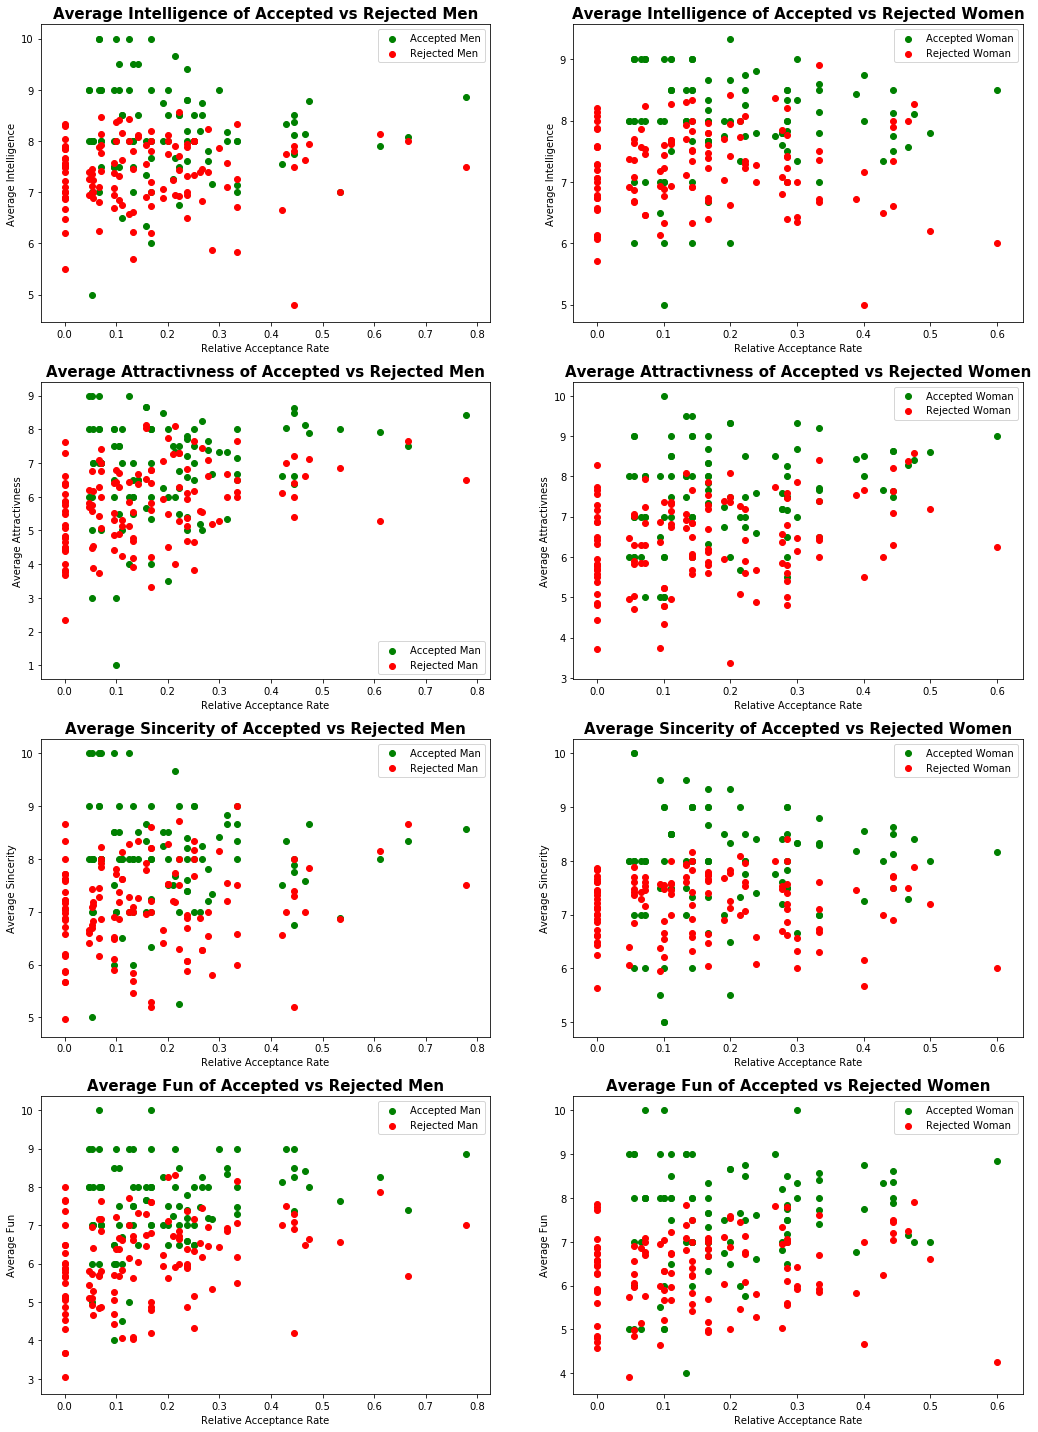

In [487]:
# What kind of men do women like? Attractive or intellligent?
#For each accepted man (match==1) get his positive rate (percentage of yes over total meetings)
#Find out average of his intelligence, attractivness

female = trainML[trainML['gender']==0]
female_ratings = female[['match', 'samerace','attr', 'sinc', 'intel','fun','pid']]
male_id = sorted(list(set(female_ratings['pid'])))
female_ratings=female_ratings.sort_values(by=['pid'])

#Store average attribute scores
men_acceptance_percentage = []
men_average_attr = []
men_average_sinc = []
men_average_intel = []
men_average_fun = []

men_rejected_percentage = []
men_average_attr1 = []
men_average_sinc1 = []
men_average_intel1 = []
men_average_fun1 = []


for x in male_id:
    current_man = female_ratings[female_ratings['pid'] == x]
    matches = len(current_man[current_man['match'] == 1])/ len(current_man['match'])
    
    #Accepted men attributes 
    current_man_yes = current_man[current_man['match'] == 1]        
    men_acceptance_percentage.append(matches )
    men_average_attr.append(np.mean(current_man_yes['attr']))
    men_average_sinc.append(np.mean(current_man_yes['sinc']))
    men_average_intel.append(np.mean(current_man_yes['intel']))
    men_average_fun.append(np.mean(current_man_yes['fun']))
    
    #Rejected men attributes
    current_man_no = current_man[current_man['match'] == 0]        
    men_rejected_percentage.append(matches)
    men_average_attr1.append(np.mean(current_man_no['attr']))
    men_average_sinc1.append(np.mean(current_man_no['sinc']))
    men_average_intel1.append(np.mean(current_man_no['intel']))
    men_average_fun1.append(np.mean(current_man_no['fun']))

    
# What kind of women do men like? Attractive or intellligent?
#For each accepted woman (match==1) get his positive rate (percentage of yes over total meetings)
#Find out average of his intelligence, attractivness
male = trainML[trainML['gender']==1]
male_ratings = male[['match', 'samerace','attr', 'sinc', 'intel','fun','pid']]
female_id = sorted(list(set(male_ratings['pid'])))
male_ratings=male_ratings.sort_values(by=['pid'])

#Store average scores
woman_acceptance_percentage = []
woman_average_attr = []
woman_average_sinc = []
woman_average_intel = []
woman_average_fun = []

#Store average scores
woman_rejected_percentage = []
woman_average_attr1 = []
woman_average_sinc1 = []
woman_average_intel1 = []
woman_average_fun1 = []


for x in female_id:
    current_woman = male_ratings[male_ratings['pid'] == x]
    matches = len(current_woman[current_woman['match'] == 1])/ len(current_woman['match'])
    
    #Accepted women attributes 
    current_woman_yes= current_woman[current_woman['match']==1]
    woman_acceptance_percentage.append(matches )
    woman_average_attr.append(np.mean(current_woman_yes['attr']))
    woman_average_sinc.append(np.mean(current_woman_yes['sinc']))
    woman_average_intel.append(np.mean(current_woman_yes['intel']))
    woman_average_fun.append(np.mean(current_woman_yes['fun']))
    
    #Rejected women attributes 
    current_woman_no= current_woman[current_woman['match']==0]
    woman_rejected_percentage.append(matches )
    woman_average_attr1.append(np.mean(current_woman_no['attr']))
    woman_average_sinc1.append(np.mean(current_woman_no['sinc']))
    woman_average_intel1.append(np.mean(current_woman_no['intel']))
    woman_average_fun1.append(np.mean(current_woman_no['fun']))
    

#Plots
fig, ax = plt.subplots(4,2, figsize=(15,20))

#Intelligence Men
ax[0][0].scatter(men_acceptance_percentage, men_average_intel,  color='green', label='Accepted Men')
ax[0][0].scatter(men_rejected_percentage, men_average_intel1,  color='red', label= 'Rejected Men')
ax[0][0].set_title('Average Intelligence of Accepted vs Rejected Men', fontweight= 'bold', fontsize = 15)
ax[0][0].set_xlabel("Relative Acceptance Rate")
ax[0][0].set_ylabel("Average Intelligence")
ax[0][0].legend()

#Intelligence Women
ax[0][1].scatter(woman_acceptance_percentage, woman_average_intel,  color='green', label='Accepted Woman')
ax[0][1].scatter(woman_rejected_percentage, woman_average_intel1,  color='red', label= 'Rejected Woman')
ax[0][1].set_title('Average Intelligence of Accepted vs Rejected Women', fontweight= 'bold', fontsize = 15)
ax[0][1].set_xlabel("Relative Acceptance Rate")
ax[0][1].set_ylabel("Average Intelligence")
ax[0][1].legend()

#Attractivness Men
ax[1][0].scatter(men_acceptance_percentage, men_average_attr,  color='green', label='Accepted Man')
ax[1][0].scatter(men_rejected_percentage, men_average_attr1,  color='red', label= 'Rejected Man')
ax[1][0].set_title('Average Attractivness of Accepted vs Rejected Men', fontweight= 'bold', fontsize = 15)
ax[1][0].set_xlabel("Relative Acceptance Rate")
ax[1][0].set_ylabel("Average Attractivness")
ax[1][0].legend()

#Attractivness Women
ax[1][1].scatter(woman_acceptance_percentage, woman_average_attr,  color='green', label='Accepted Woman')
ax[1][1].scatter(woman_rejected_percentage, woman_average_attr1,  color='red', label= 'Rejected Woman')
ax[1][1].set_title('Average Attractivness of Accepted vs Rejected Women', fontweight= 'bold', fontsize = 15)
ax[1][1].set_xlabel("Relative Acceptance Rate")
ax[1][1].set_ylabel("Average Attractivness")
ax[1][1].legend()


#Sincerity Men
ax[2][0].scatter(men_acceptance_percentage, men_average_sinc,  color='green', label='Accepted Man')
ax[2][0].scatter(men_rejected_percentage, men_average_sinc1,  color='red', label= 'Rejected Man')
ax[2][0].set_title('Average Sincerity of Accepted vs Rejected Men', fontweight= 'bold', fontsize = 15)
ax[2][0].set_xlabel("Relative Acceptance Rate")
ax[2][0].set_ylabel("Average Sincerity")
ax[2][0].legend()

#Sincerity Women
ax[2][1].scatter(woman_acceptance_percentage, woman_average_sinc,  color='green', label='Accepted Woman')
ax[2][1].scatter(woman_rejected_percentage, woman_average_sinc1,  color='red', label= 'Rejected Woman')
ax[2][1].set_title('Average Sincerity of Accepted vs Rejected Women', fontweight= 'bold', fontsize = 15)
ax[2][1].set_xlabel("Relative Acceptance Rate")
ax[2][1].set_ylabel("Average Sincerity")
ax[2][1].legend()

#Fun Men
ax[3][0].scatter(men_acceptance_percentage, men_average_fun,  color='green', label='Accepted Man')
ax[3][0].scatter(men_rejected_percentage, men_average_fun1,  color='red', label= 'Rejected Man')
ax[3][0].set_title('Average Fun of Accepted vs Rejected Men', fontweight= 'bold', fontsize = 15)
ax[3][0].set_xlabel("Relative Acceptance Rate")
ax[3][0].set_ylabel("Average Fun")
ax[3][0].legend()

#Fun Women
ax[3][1].scatter(woman_acceptance_percentage, woman_average_fun,  color='green', label='Accepted Woman')
ax[3][1].scatter(woman_rejected_percentage, woman_average_fun1,  color='red', label= 'Rejected Woman')
ax[3][1].set_title('Average Fun of Accepted vs Rejected Women', fontweight= 'bold', fontsize = 15)
ax[3][1].set_xlabel("Relative Acceptance Rate")
ax[3][1].set_ylabel("Average Fun")
ax[3][1].legend()

fig.tight_layout()
plt.show()

In [488]:
#Get an overall view of the data & look for outliers /transform columns to categorical data 
trainML.describe()

,gender,match,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,attr_o,sinc_o,intel_o,fun_o,met_o,age,race,imprace,imprelig,goal,date,go_out,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,attr3_1,sinc3_1,fun3_1,intel3_1,attr,sinc,intel,fun,met,iid,pid,shar1_1
count,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000
mean,0.500000,0.163055,0.354821,26.670195,2.888137,22.516731,17.786720,20.393757,17.129052,10.537911,11.525055,6.259185,7.237048,7.417251,6.396814,1.967768,26.671348,2.888137,3.558776,3.774919,2.163597,4.972914,2.160076,5.022752,6.393824,4.480769,6.251896,7.811213,7.049025,6.789816,5.817985,3.567172,5.590195,7.814193,5.086674,6.866197,7.965872,7.023294,7.979144,5.660347,4.578548,22.444789,17.759456,20.432863,17.118908,10.676278,7.019772,8.329090,7.670910,8.389762,6.259185,7.237048,7.417251,6.396814,1.252709,281.143554,281.143554,11.628378
std,0.500068,0.369466,0.478524,3.843566,1.286699,11.843763,7.488587,7.106563,6.083886,5.902359,6.568299,1.934096,1.720916,1.480487,1.931412,0.176639,3.847718,1.286699,2.779840,2.890485,1.421207,1.410501,1.188584,3.320751,2.655073,2.861739,2.518624,1.778085,2.046740,2.296080,2.598985,2.477443,2.446444,1.925920,2.444411,2.193060,1.735075,2.176573,1.651694,2.627000,2.716747,11.922913,7.517575,7.270016,6.113910,6.251150,1.431499,1.445211,1.585729,1.018939,1.934096,1.720916,1.480487,1.931412,0.434624,164.062003,164.062003,6.570725
min,0.000000,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,24.000000,2.000000,15.000000,15.000000,17.000000,14.000000,5.000000,8.000000,5.000000,6.000000,7.000000,5.000000,2.000000,24.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,2.000000,4.000000,2.000000,5.000000,7.000000,6.000000,5.000000,3.000000,1.000000,4.000000,7.000000,3.000000,5.000000,7.000000,6.000000,7.000000,4.000000,2.000000,15.000000,15.000000,16.000000,14.000000,5.000000,6.000000,8.000000,7.000000,8.000000,5.000000,6.000000,7.000000,5.000000,1.000000,129.000000,129.000000,8.000000
50%,0.500000,0.000000,0.000000,26.000000,2.000000,20.000000,19.000000,20.000000,18.000000,10.000000,10.000000,6.000000,7.000000,7.417251,6.396814,2.000000,26.000000,2.000000,3.000000,3.000000,2.000000,5.000000,2.000000,4.000000,7.000000,4.000000,7.000000,8.000000,7.000000,7.000000,6.000000,3.000000,6.000000,8.000000,5.000000,7.000000,8.000000,7.000000,8.000000,6.000000,4.000000,20.000000,19.050000,20.000000,18.000000,10.000000,7.000000,9.000000,8.000000,8.000000,6.000000,7.000000,7.417251,6.396814,1.000000,287.500000,287.500000,10.000000
75%,1.000000,0.000000,1.000000,29.000000,4.000000,25.000000,20.000000,25.000000,20.000000,15.000000,15.000000,8.000000,8.000000,8.000000,8.000000,2.000000,29.000000,4.000000,6.000000,6.000000,2.000000

In [489]:
#There seem to be a 14 for gaming (max allowed is 10. Hence, I will change everything >10 to 10)
trainML.loc[(trainML.gaming>10),'gaming']= 10

In [490]:
#Transform categorical columns to categorical data
cols = ['gender', 'match', 'samerace', 'race_o','met_o','race','goal','date','go_out','met']
trainML[cols] = trainML[cols].astype('category')
trainML.describe() 

,age_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,attr_o,sinc_o,intel_o,fun_o,age,imprace,imprelig,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,attr3_1,sinc3_1,fun3_1,intel3_1,attr,sinc,intel,fun,iid,pid,shar1_1
count,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.00000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000
mean,26.670195,22.516731,17.786720,20.393757,17.129052,10.537911,11.525055,6.259185,7.237048,7.417251,6.396814,26.671348,3.558776,3.774919,5.022752,6.393824,4.480769,6.251896,7.811213,7.049025,6.789816,5.817985,3.54442,5.590195,7.814193,5.086674,6.866197,7.965872,7.023294,7.979144,5.660347,4.578548,22.444789,17.759456,20.432863,17.118908,10.676278,7.019772,8.329090,7.670910,8.389762,6.259185,7.237048,7.417251,6.396814,281.143554,281.143554,11.628378
std,3.843566,11.843763,7.488587,7.106563,6.083886,5.902359,6.568299,1.934096,1.720916,1.480487,1.931412,3.847718,2.779840,2.890485,3.320751,2.655073,2.861739,2.518624,1.778085,2.046740,2.296080,2.598985,2.39862,2.446444,1.925920,2.444411,2.193060,1.735075,2.176573,1.651694,2.627000,2.716747,11.922913,7.517575,7.270016,6.113910,6.251150,1.431499,1.445211,1.585729,1.018939,1.934096,1.720916,1.480487,1.931412,164.062003,164.062003,6.570725
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.00000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,24.000000,15.000000,15.000000,17.000000,14.000000,5.000000,8.000000,5.000000,6.000000,7.000000,5.000000,24.000000,1.000000,1.000000,2.000000,4.000000,2.000000,5.000000,7.000000,6.000000,5.000000,3.000000,1.00000,4.000000,7.000000,3.000000,5.000000,7.000000,6.000000,7.000000,4.000000,2.000000,15.000000,15.000000,16.000000,14.000000,5.000000,6.000000,8.000000,7.000000,8.000000,5.000000,6.000000,7.000000,5.000000,129.000000,129.000000,8.000000
50%,26.000000,20.000000,19.000000,20.000000,18.000000,10.000000,10.000000,6.000000,7.000000,7.417251,6.396814,26.000000,3.000000,3.000000,4.000000,7.000000,4.000000,7.000000,8.000000,7.000000,7.000000,6.000000,3.00000,6.000000,8.000000,5.000000,7.000000,8.000000,7.000000,8.000000,6.000000,4.000000,20.000000,19.050000,20.000000,18.000000,10.000000,7.000000,9.000000,8.000000,8.000000,6.000000,7.000000,7.417251,6.396814,287.500000,287.500000,10.000000
75%,29.000000,25.000000,20.000000,25.000000,20.000000,15.000000,15.000000,8.000000,8.000000,8.000000,8.000000,29.000000,6.000000,6.000000,7.000000,9.000000,7.000000,8.000000,9.000000,9.000000,9.000000,8.000000,5.00000,8.000000,9.000000,7.000000,9.000000,9.000000,9.000000,9.000000,8.000000,7.000000,25.000000,20.000000,25.000000,20.000000,15.000000,8.000000,9.000000,9.000000,9.000000,8.000000,8.000000,8.000000,8.000000,434.000000,434.000000,15.000000
max,55.000000,80.000000,60.000000,50.000000,50.000000,30.000000,30.000000,10.000000,10.000000,10.000000,10.000000,55.000000,10.000000,10.000000,17.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,80.000000,60.000000,50.000000,50.000000,53.000000,10.000000,1

In [491]:
trainML[cols].describe()

,gender,match,samerace,race_o,met_o,race,goal,date,go_out,met
count,3692,3692,3692,3692.0,3692.0,3692.0,3692.0,3692.0,3692.0,3692.0
unique,2,2,2,5.0,2.0,5.0,6.0,7.0,7.0,2.0
top,1,0,0,2.0,2.0,2.0,1.0,6.0,1.0,1.0
freq,1846,3090,2382,1917.0,3573.0,1917.0,1487.0,981.0,1271.0,2759.0


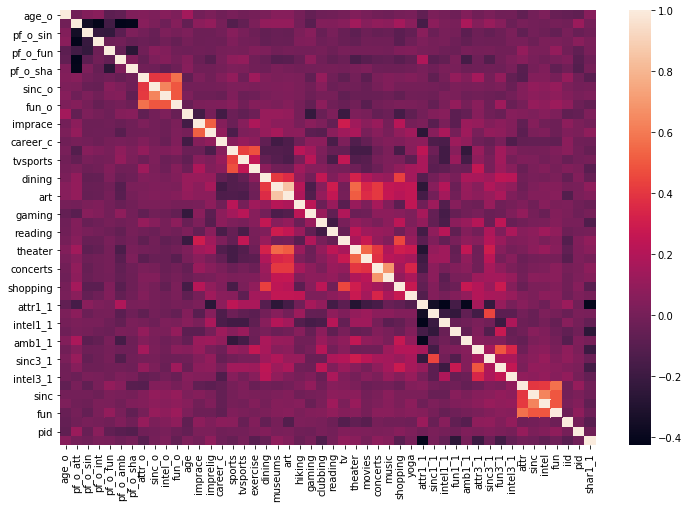

In [492]:
#Correlation Analysis, this is too crowded.Hence, we need to reduce the space. 
import seaborn as sn
corrMatrix=trainML.corr()

plt.figure(figsize=(12,8))
sn.heatmap(corrMatrix)
plt.show()

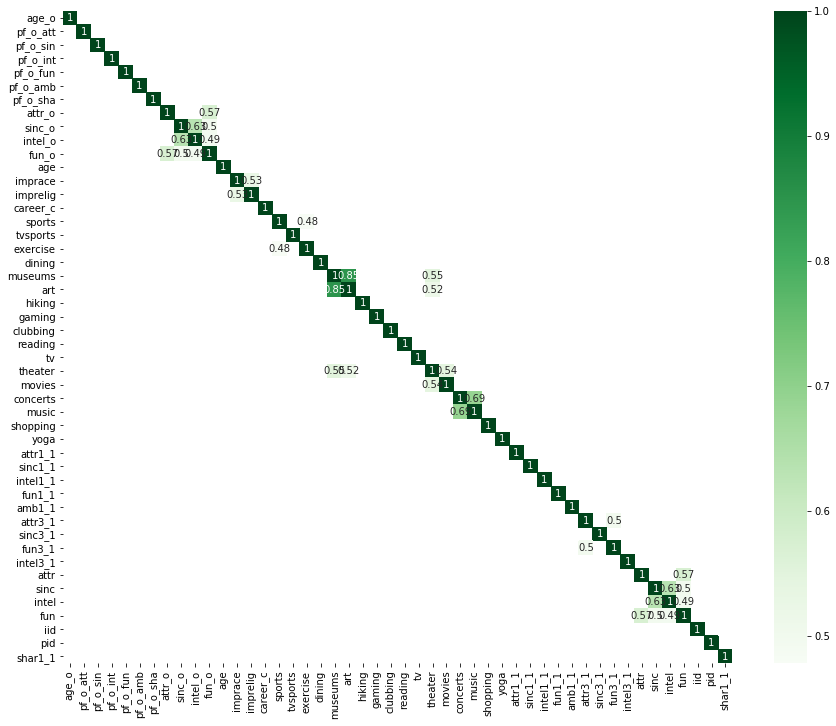

In [493]:
#Only check out correlations > abs(.45)
kot = corrMatrix[(corrMatrix>=.45) | (corrMatrix<= -.45)]
plt.figure(figsize=(15,12))
sn.heatmap(kot, cmap="Greens",annot=True)

In [494]:
#List of top Correlations
all_corr = trainML.corr().abs().unstack()
top_correlations= (all_corr[(all_corr>0.45) & (all_corr !=1)]).sort_values(ascending=False)

#Remove duplicate & show dataframe
top_corr=top_correlations.to_frame()
top_corr=top_corr.iloc[::2]
top_corr.columns=['(Variable 1,Variable 2): Corr Score']
top_corr

,,"(Variable 1,Variable 2): Corr Score"
art,museums,0.850411
music,concerts,0.688870
sinc_o,intel_o,0.633157
intel_o,sinc_o,0.633157
attr_o,fun_o,0.572715
attr,fun,0.572715
museums,theater,0.550247
movies,theater,0.544913
imprelig,imprace,0.525612
art,theater,0.515133


---

# Part 2

**Feature Selection**

>There is an attempt to reduce the number of covariates in our final training/testing models. As a result, I've attempted
to perform vairable selection by making use of the feature importances option that is present in decision trees,random forests,
extra tree classifier. The bar graphs are able to show the top 20 fetatures that explain most of the variance present in the data. 
There is some overalp between the variables that are deemed important in all 3 methods. The startegy has been to use these
features in the predictor space to use in the final classification of match. Also, a Lasso model with l1 penalization has been 
used so as to not include in the final model variables that will end up having a coefficient of zero (i.e. not important).

**Model Selection**

> I have decided to train classifiers based on 
    - Random Forest
    - Logistic Regression
    - Support Vector Machines
    - Decision Tree 
The reason for  picking these ones over other possible models resides in their flexibility to accomodate a wide range of
possible relationships between covariates and response (match/no match). Also, the presence of hyper-parameters allows for
an imporovement over the fit.  Finally, the basic metric of evluation has been the weighted f1 score- some models have yielded better results than others. As a result, the leading choice in terms of model selection has been indeed influenced/ driven by the accurcay reflected in the f1 score. 
The overall strategy has been that to divide the training dataset into training & validation. I have split the training 
dataset twice, with the intent to get once some data to train the model, & two to get an idea of the fit. Finally, I have
based my final decision, on a third portion of unseen data. This has ensured no data leakage, and better estimates for 
accuracy in terms of weighted f1-score. 
On a high level
    - I have standardized features (if needed)
    - specified ranges of values for hyper-parameters
    - trained the model on each possible set of hyperparametrs (grid search & cross val)
    - Gotten hyper-parametrs of models with highest weighted f1_score
    - Evaluate weighted f1_score Prediction on test set 
    - Pick model that has best weighted f1_score & interpretability 
Model                  | Weighted F1 Score
---------------------- | -------------
Random Forest          | 0.8456
Logistics Regression   | 0.8140
Support Vector Machine | 0.7978
Decision Tree          | 0.7505

**Model Interpretation**

> **Random Forest** has the highest weighted f1_score. As a result, it has been designated as the ultimate model to apply to the testML dataset. The best hyperparameters for this model are the following-n_estimators=200,max_features= 'sqrt',max_depth=50, min_samples_split=2,min_samples_leaf= 1, and bootstrap= False. N_estimators represents the total number of trees in our "forest." Max_features represents the number of features to consider when looking for the best split. Max_depth is the maximum depth of the tree-the deeper the more complex (overfitting possible). Min_sample_split is the minimum number of samples required to split an internal node. Min_samples_leaf is the minimum number of samples required to be at a leaf node. Finally, bootstrap is in relation to whether bootstrap samples are used when building trees- in our case it is False and as a result the whole dataset is used to build each tree. In this model, it is simple to get an idea of the best predictors that allow for a majority of the explanation in the variance. The top 8 predictors are: fun, attractivness, iid, pid, age, career, inteeligence, and sincerity. We can releate this to our response (match/no match) in such a way that individuals with high/low fun,attractivness, age, intelligence,... and so on are more likely to match/not match. In addition to making our interpretation a bit more intuitive, random forests, also allow us to have a graphical results of what the "forest" looks like. In the top (most important features), we have intelligence, sincerity & attractivness, which are the top qualities that aid in the prediction of a possible match.


> A **logistics** model is one that is used when there is a binary outcome (e.g. 0/1, yes/no, off/on,...). Hence, it made sense intuitively to use this model given that we have two possible outcomes for our response: match or no match. In logistics regresion we are trying to determine the weights b0, b1,... bn that maximize the log likelihood function.  Given that logistics regression is  a linear classifier,we can crate a function f(x) with our covariates and the w weights. We can calculate the function p(x) =(1/1+exp(-f(X))) which can be interpreted as the predicted probability that the output for a given 𝐱 is equal to 1. Therefore, 1 − 𝑝(𝑥) is the probability that the output is 0. Logistic regression determines the best predicted weights b0, b1,... bn such that the function 𝑝(𝐱) is as close as possible to all actual responses 𝑦i, 𝑖 = 1, …, n. Hence, this function is reppreesntative of what makes a determinate set of covariates a match or a no match. The best logistics regression is given with the following hyperparameters: penalty='l2',solver='liblinear',  C=0.01. The penalty l2 penalizes the log likelihood function with the scaled sum of the squares of the weights. Liblienar is simply using a linear boundry for the two classes, and  the C parameter is the regularization parameter -smaller values specify stronger regularization.

> In addition, as mentioned in class, I have checked other metrics for comparison such as RMSE,accuracy, precision, and recall. In all cases random forest is always performing better than logistics. Hence, it will be used as the final model to predict the testML dataset.


Metric                 | Random Forest | Logistics Regression
---------------------- | --------------| --------------------
MSE                    | 0.1353        |0.1566
Accuracy               | 0.8647        |0.8434
Precision              | 0.7101        |0.6111
Recall                 | 0.3577        |0.2409


**TestML Dataset** 

<u>Update Strategey</u>

- Age
    - fill nan's witht values from a Gaussian distribution with mean and sigma similar to those of age distribution
    
 - Partner Preference attributes
     - Fill nan's with zeros
     - If total sum of pf attributes > 100, simply replace each value with the mean of that category

- Partner Attributes 
     - Fill nan's with -1
     - If total sum of  attributes > 10 or < 0 (nans) , simply replace each value with the mean of that category
     
- Subject Attributes
     - Fill nan's with -1
     - If total sum of  attributes > 10 or < 0 (nans) , simply replace each value with the mean of that category

- Career
     - If only career_c is nan (replace nan with the equivalent carrer encoding from career)
     - If both nan, replace nan with other encoding 

- Goal
     - Impute goal by filling missing values by previous values

- Met
     - Impute met by filling missing values by previous values
     - Change 3's to 2 
     - Change 0's to 1
     
<u>Notes</u> 

The results have been shared with the submission under the file TestML. 

In [253]:
trainML.head()

,gender,match,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,attr_o,sinc_o,intel_o,fun_o,met_o,age,field,race,imprace,imprelig,from,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,attr3_1,sinc3_1,fun3_1,intel3_1,attr,sinc,intel,fun,met,iid,pid,shar1_1
3,0,1,1,28.0,2.0,50.0,10.0,30.0,10.0,0.0,0.0,7.0,5.0,5.0,7.0,2.0,23.0,social work,2.0,10.0,9.0,Florida,1.0,3.0,1.0,social worker,9.0,2.0,1.0,10.0,10.0,5.0,5.0,2.0,1.0,7.0,6.0,8.0,8.0,7.0,6.0,9.0,10.0,4.0,17.0,18.0,18.0,15.0,17.0,10.0,10.0,9.0,8.0,5.0,10.0,8.0,5.0,2.0,355,528,15.0
4,0,1,1,26.0,2.0,25.0,10.0,20.0,20.0,15.0,10.0,8.0,6.0,7.0,7.0,2.0,23.0,social work,2.0,10.0,9.0,Florida,1.0,3.0,1.0,social worker,9.0,2.0,1.0,10.0,10.0,5.0,5.0,2.0,1.0,7.0,6.0,8.0,8.0,7.0,6.0,9.0,10.0,4.0,17.0,18.0,18.0,15.0,17.0,10.0,10.0,9.0,8.0,4.0,7.0,9.0,9.0,2.0,355,291,15.0
5,0,0,1,21.0,2.0,60.0,15.0,0.0,15.0,0.0,10.0,9.0,8.0,8.0,10.0,2.0,23.0,social work,2.0,10.0,9.0,Florida,1.0,3.0,1.0,social worker,9.0,2.0,1.0,10.0,10.0,5.0,5.0,2.0,1.0,7.0,6.0,8.0,8.0,7.0,6.0,9.0,10.0,4.0,17.0,18.0,18.0,15.0,17.0,10.0,10.0,9.0,8.0,3.0,10.0,8.0,6.0,2.0,355,522,15.0
6,0,0,1,22.0,2.0,21.0,20.0,19.0,20.0,10.0,10.0,7.0,8.0,7.0,5.0,2.0,23.0,social work,2.0,10.0,9.0,Florida,1.0,3.0,1.0,social worker,9.0,2.0,1.0,10.0,10.0,5.0,5.0,2.0,1.0,7.0,6.0,8.0,8.0,7.0,6.0,9.0,10.0,4.0,17.0,18.0,18.0,15.0,17.0,10.0,10.0,9.0,8.0,3.0,10.0,5.0,3.0,2.0,355,271,15.0
7,0,0,1,22.0,2.0,30.0,10.0,20.0,30.0,0.0,10.0,7.0,7.0,6.0,5.0,2.0,23.0,social work,2.0,10.0,9.0,Florida,1.0,3.0,1.0,social worker,9.0,2.0,1.0,10.0,10.0,5.0,5.0,2.0,1.0,7.0,6.0,8.0,8.0,7.0,6.0,9.0,10.0,4.0,17.0,18.0,18.0,15.0,17.0,10.0,10.0,9.0,8.0,4.0,10.0,9.0,8.0,2.0,355,359,15.0


Text(0, 0.5, 'Importance')

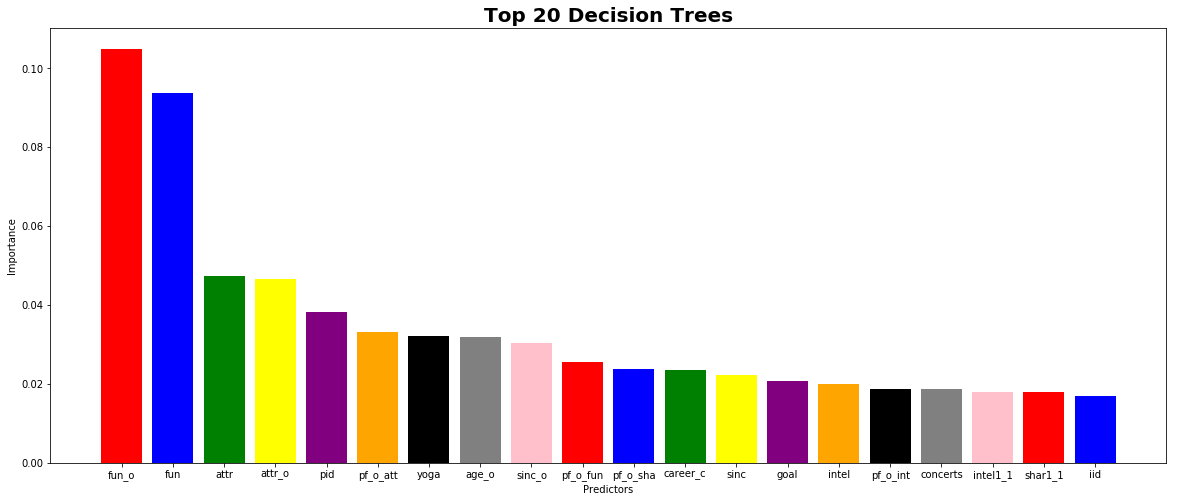

In [495]:
'''
Feature Selection Description
-----------------------------
There is an attempt to reduce the number of covariates in our final training/testing models. As a result, I've attempted
to perform vairable selection by making use of the feature importances option that is present in decision trees,random forests,
extra tree classifier. The bar graphs are able to show the top 20 fetatures that explain most of the variance present in the data. 
There is some overalp between the variables that are deemed important in all 3 methods. The startegy has been to use these
features in the predictor space to use in the final classification of match. Also, a Lasso model with l1 penalization has been 
used so as to not include in the final model variables that will end up having a coefficient of zero (i.e. not important).
'''
#Features Selection 1
from sklearn.model_selection import train_test_split
X= trainML.drop(['match','field','from','career'], axis=1)
y= trainML['match']

#Split Data into training/testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


#Decision Tree
def decision_tree_feature_selection(X_train, y_train,X_test, y_test):
    from sklearn.tree import DecisionTreeClassifier
    
    #Fit model
    clf = DecisionTreeClassifier().fit(X_train, y_train)

    train_score= clf.score(X_train, y_train)
    test_score= clf.score(X_test, y_test)
    feature_importances=clf.feature_importances_
    
    my_dict = dict(zip(X_train.columns,feature_importances))
    my_dict2= sorted(my_dict, key=my_dict.get, reverse=True)
    top_20_feat=sorted(feature_importances, reverse= True)
    
    return my_dict2[0:20], top_20_feat[0:20]

x1,y = decision_tree_feature_selection(X_train, y_train,X_test, y_test)

#Plots
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(x1, y, color =['red', 'blue', 'green', 'yellow','purple','orange','black','gray','pink'])
ax.set_title('Top 20 Decision Trees', fontweight='bold',size=20)
ax.set_xlabel('Predictors')
ax.set_ylabel('Importance')

Text(0, 0.5, 'Importance')

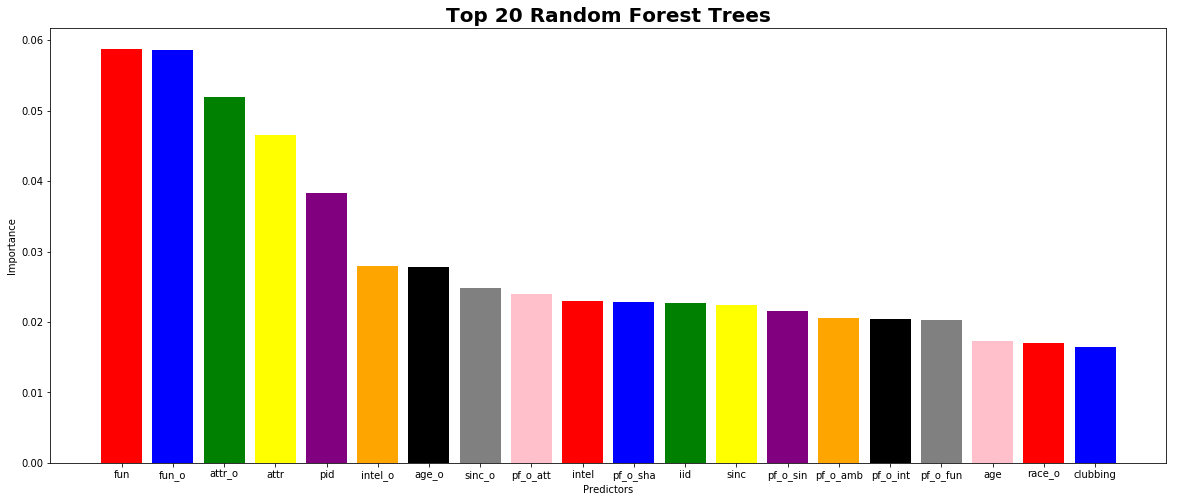

In [496]:
def random_fores_feature_selection(X_train, y_train,X_test, y_test):
    from sklearn.ensemble import RandomForestClassifier
    
    #Fit model
    clf = RandomForestClassifier(random_state=0).fit(X_train, y_train)
    
    #Metrics
    train_score= clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    feature_importances= clf.feature_importances_
    
    my_dict = dict(zip(X_train.columns,feature_importances))
    my_dict2= sorted(my_dict, key=my_dict.get, reverse=True)
    top_20_feat=sorted(feature_importances, reverse= True)
    
    return my_dict2[0:20], top_20_feat[0:20]

x2,y =random_fores_feature_selection(X_train, y_train,X_test, y_test)

#Plots
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(x2, y, color =['red', 'blue', 'green', 'yellow','purple','orange','black','gray','pink'])
ax.set_title('Top 20 Random Forest Trees', fontweight='bold', size=20)
ax.set_xlabel('Predictors')
ax.set_ylabel('Importance')

Text(0, 0.5, 'Importance')

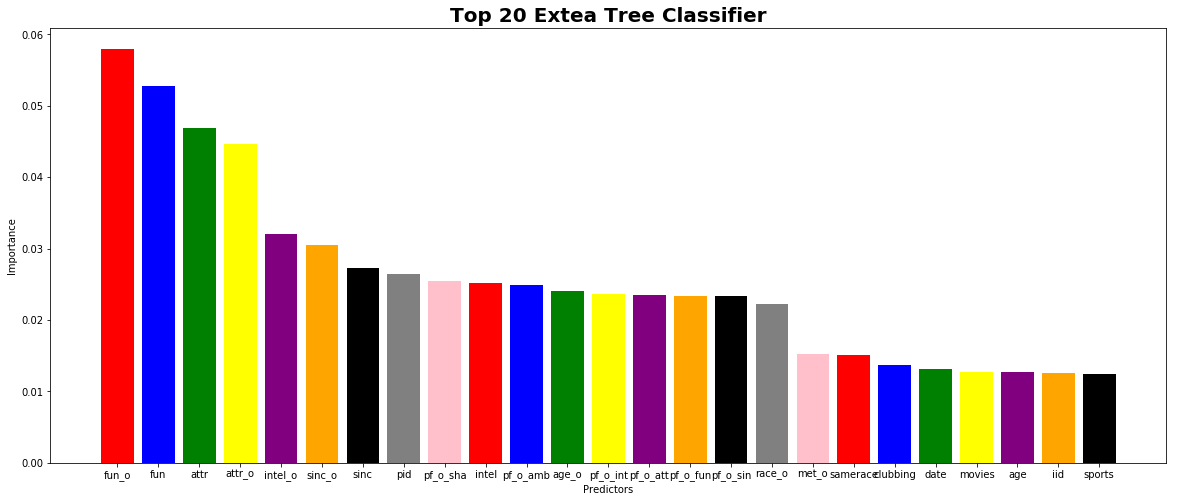

In [497]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X_train,y_train)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns,)

a= feat_importances.nlargest(25).to_frame()



#Plots
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(a.index, a[0], color =['red', 'blue', 'green', 'yellow','purple','orange','black','gray','pink'])
ax.set_title('Top 20 Extea Tree Classifier', fontweight='bold', size=20)
ax.set_xlabel('Predictors')
ax.set_ylabel('Importance')

In [498]:
#Feature Selection Lasso
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

def Lasso_feture_selection(X_train, y_train,X_test, y_test):
    
    #Standardize/normalize the data (mean=0, sd=1)
    scaler = StandardScaler()
    standardized_X_train= scaler.fit_transform(X_train)
    standardized_X_test = scaler.transform(X_test)
    
    #Remove features equal to zero 
    rem_feats = []
    C=[0.001,0.01,0.1,1]
    for c in C:
        sel_ = SelectFromModel(LogisticRegression(C=c, penalty='l1',solver='liblinear'))
        sel_.fit(standardized_X_train, y_train)    
        selected_feat = X_train.columns[(sel_.get_support())]
        removed_feats = X_train.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
        rem_feats.append(removed_feats)
    
    return rem_feats 
    
Lasso_feture_selection(X_train, y_train,X_test, y_test)

[Index(['gender', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin',
        'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'attr_o', 'sinc_o',
        'intel_o', 'fun_o', 'met_o', 'age', 'race', 'imprace', 'imprelig',
        'goal', 'date', 'go_out', 'career_c', 'sports', 'tvsports', 'exercise',
        'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading',
        'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga',
        'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'attr3_1',
        'sinc3_1', 'fun3_1', 'intel3_1', 'attr', 'sinc', 'intel', 'fun', 'met',
        'iid', 'pid', 'shar1_1'],
       dtype='object'),
 Index(['gender', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin',
        'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'sinc_o', 'intel_o',
        'met_o', 'age', 'race', 'imprace', 'imprelig', 'goal', 'date', 'go_out',
        'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
        'art', 'hiking',

In [504]:
#Take itersection of all outputs
def Intersection(x1,x2): 
    return set(x1).intersection(x2) 
inter= Intersection(x1,x2)
print(sorted(inter))
print(sorted(x1))
print(sorted(x2))
print(sorted(a.index))


X_reduced = trainML[['age','age_o', 
                     'race_o', 
                     'pf_o_att','pf_o_sin','pf_o_int','pf_o_fun','pf_o_amb','pf_o_sha',
                     'attr_o','sinc_o', 'intel_o','fun_o',
                     'goal','career_c',
                     #Do not improve fit. 
                     #samerace, met_o,field, race, imprace, imprelig, from, date, go_out, career, [hobbies]
                    # 'attr1_1','sinc1_1','intel1_1','fun1_1','amb1_1' ,'shar1_1',
                   #  'attr3_1','sinc3_1','fun3_1','intel3_1',
                     'attr','sinc','intel','fun','met',
                     'iid','pid', 'race']]
y= trainML['match']

#Split Data into training/testing 
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_reduced, y, random_state=0)

['age_o', 'attr', 'attr_o', 'career_c', 'fun', 'fun_o', 'goal', 'iid', 'intel', 'pf_o_att', 'pf_o_fun', 'pf_o_int', 'pf_o_sha', 'pid', 'sinc', 'sinc_o']
['age_o', 'attr', 'attr_o', 'career_c', 'concerts', 'fun', 'fun_o', 'goal', 'iid', 'intel', 'intel1_1', 'pf_o_att', 'pf_o_fun', 'pf_o_int', 'pf_o_sha', 'pid', 'shar1_1', 'sinc', 'sinc_o', 'yoga']
['age', 'age_o', 'attr', 'attr_o', 'career_c', 'fun', 'fun_o', 'goal', 'iid', 'intel', 'intel_o', 'met', 'pf_o_amb', 'pf_o_att', 'pf_o_fun', 'pf_o_int', 'pf_o_sha', 'pf_o_sin', 'pid', 'race', 'race_o', 'sinc', 'sinc_o']
['age', 'age_o', 'attr', 'attr_o', 'clubbing', 'date', 'fun', 'fun_o', 'iid', 'intel', 'intel_o', 'met_o', 'movies', 'pf_o_amb', 'pf_o_att', 'pf_o_fun', 'pf_o_int', 'pf_o_sha', 'pf_o_sin', 'pid', 'race_o', 'samerace', 'sinc', 'sinc_o', 'sports']


In [34]:
'''
Model Selection Description
----------------------------
I have decided to train classifiers based on 
    - Logistic Regression
    - Random Forest
    - Support Vector Machines
    - Decision Tree 
    
The reason for  picking these ones over other possible models resides in their flexibility to accomodate a wide range of
possible relationships between covariates and response (match/no match). Also, the presence of hyper-parameters allows for
an imporovement over the fit. 

The overall strategy has been that to divide the training dataset into training & validation. I have split the training 
dataset twice, with the intent to get once some data to train the model, & two to get an idea of the fit. Finally, I have
based my final decision, on a third portion of unseen data. This has ensured no data leakage, and better estimates for 
accuracy in terms of f1-score. 

On a high level
    - I have standardized features (if needed)
    - specified ranges of values for hyper-parameters
    - trained the model on each possible set of hyperparametrs (grid search & cross val)
    - Gotten hyper-parametrs of models with highest weighted f1_score
    - Evaluate weighted f1_score Prediction on test set 
    - Pick model that has best weighted f1_score & interpretability 
    
    '''
# -------------------- Logistic Regression ---------------------------
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import  LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#Training/Validation
X_train, X_test, y_train, y_test = train_test_split(X_train2, y_train2, random_state=0)

#Standardize/normalize the data (mean=0, sd=1)
scaler = StandardScaler()
standardized_X_train = scaler.fit_transform(X_train)
standardized_X_test = scaler.transform(X_test)

#Regularization
C_list = [0.001, 0.01,0.1, 1, 2, 3, 5, 10, 50, 100, 200]
penalty_list= ['l1','l2', 'elasticnet', 'none']
solver_list= ['newton-cg', 'lbfgs', 'sag', 'saga','liblinear']
tuned_parameters = [{'penalty': penalty_list, 'solver': solver_list, 'C': C_list}]
n_folds = 10

#Logistics
logistic = LogisticRegression()
clf = GridSearchCV(logistic, tuned_parameters, cv=n_folds, refit=False, scoring='f1_micro')

#Fit grid search
best_model = clf.fit(standardized_X_train, y_train)

#View best hyperparameters
print(best_model.best_params_)

{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


In [500]:
#Logistics best parameters from GS

#Standardize/normalize the data (mean=0, sd=1)
scaler = StandardScaler()
standardized_X_train = scaler.fit_transform(X_train2)
standardized_X_test = scaler.transform(X_test2)

#Best Model Logistics: fit, prediction
model = LogisticRegression(penalty='l2',solver='liblinear',  C=0.01, random_state=0, ).fit(standardized_X_train, y_train2)
logr_pred = model.predict(standardized_X_test)
f1_log= f1_score(y_test2, logr_pred,average = 'weighted')
print(f1_log)

0.8002133511125928


In [42]:
#Random Forests
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import RandomizedSearchCV

#Parameters
# Number of trees in random forest
n_estimators = [1,50,100,150,200,1000]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [10,30,40,50,70]

max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [1,2,3,4,5]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid

param = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# First create the base model to tune
rf = RandomForestClassifier()

model = GridSearchCV(estimator = rf, param_grid = param, 
                          cv = 3, n_jobs = -1, verbose = 2,scoring='f1_micro' )

# Fit the random search model
model.fit(X_train, y_train)

#Unfortunately, I accidentataly re-ran the code, and the parameters were a bit different
#I kept the old parameters from the previous iteratin given they consistently yiled better f score.
model.best_params_

Fitting 3 folds for each of 2160 candidates, totalling 6480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 18.1min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 22.6min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 28.1min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed: 34.4min
[Parallel(n_jobs=-1)]: Done 5824 tasks      | elapsed: 43.0min
[Parallel(n_jobs=-1)]: Done 6480 out of 6480 | elapsed: 48.7min finished


{'bootstrap': True,
 'max_depth': 50,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 100}

In [505]:
#Random Forest best params GS
#Training Error
clf = RandomForestClassifier(random_state=0,
                             n_estimators=200,
                            max_features= 'sqrt',        
                           max_depth=50,
                           min_samples_split=2,
                           min_samples_leaf= 1,
                           bootstrap= False).fit(X_train, y_train)
rfc= clf.predict(X_test)
f1= f1_score(y_test, rfc,average = 'weighted')
print(f1)

#Testing error
clf = RandomForestClassifier(random_state=0,
                             n_estimators=200,
                            max_features= 'sqrt',        
                           max_depth=50,
                           min_samples_split=2,
                           min_samples_leaf= 1,
                           bootstrap= False).fit(X_train2, y_train2)
rfc= clf.predict(X_test2)
f1_rfc= f1_score(y_test2, rfc,average = 'weighted')
print(f1_rfc)

0.8073669182030392
0.8158828922018012


Text(0, 0.5, 'Importance')

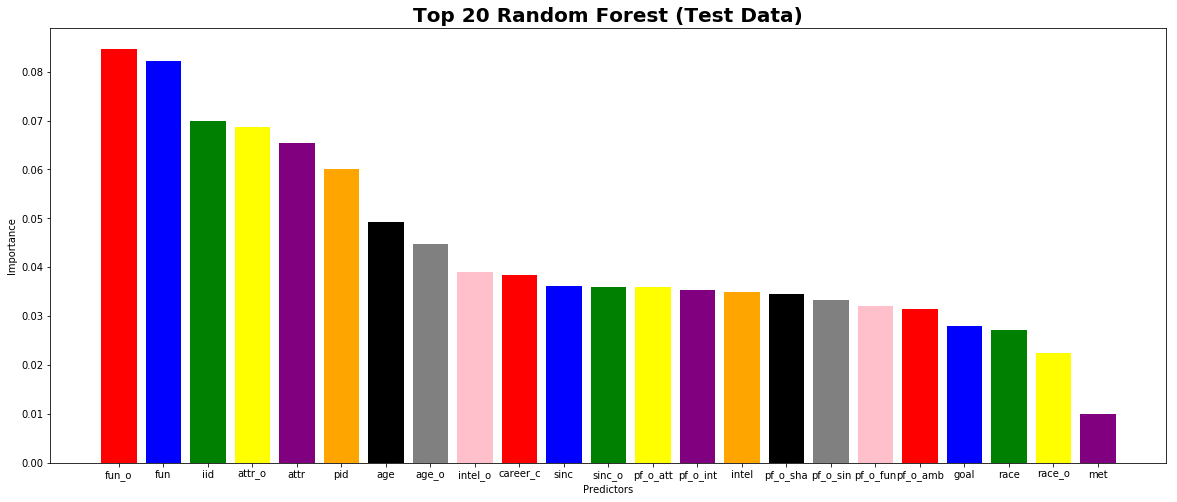

In [502]:
feature_importances= clf.feature_importances_
my_dict = dict(zip(X_train2.columns,feature_importances))
my_dict2= sorted(my_dict, key=my_dict.get, reverse=True)
top_20_feat=sorted(feature_importances, reverse= True)

x2 =my_dict2
y=top_20_feat

#Plots
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(x2, y, color =['red', 'blue', 'green', 'yellow','purple','orange','black','gray','pink'])
ax.set_title('Top 20 Random Forest (Test Data)', fontweight='bold', size=20)
ax.set_xlabel('Predictors')
ax.set_ylabel('Importance')

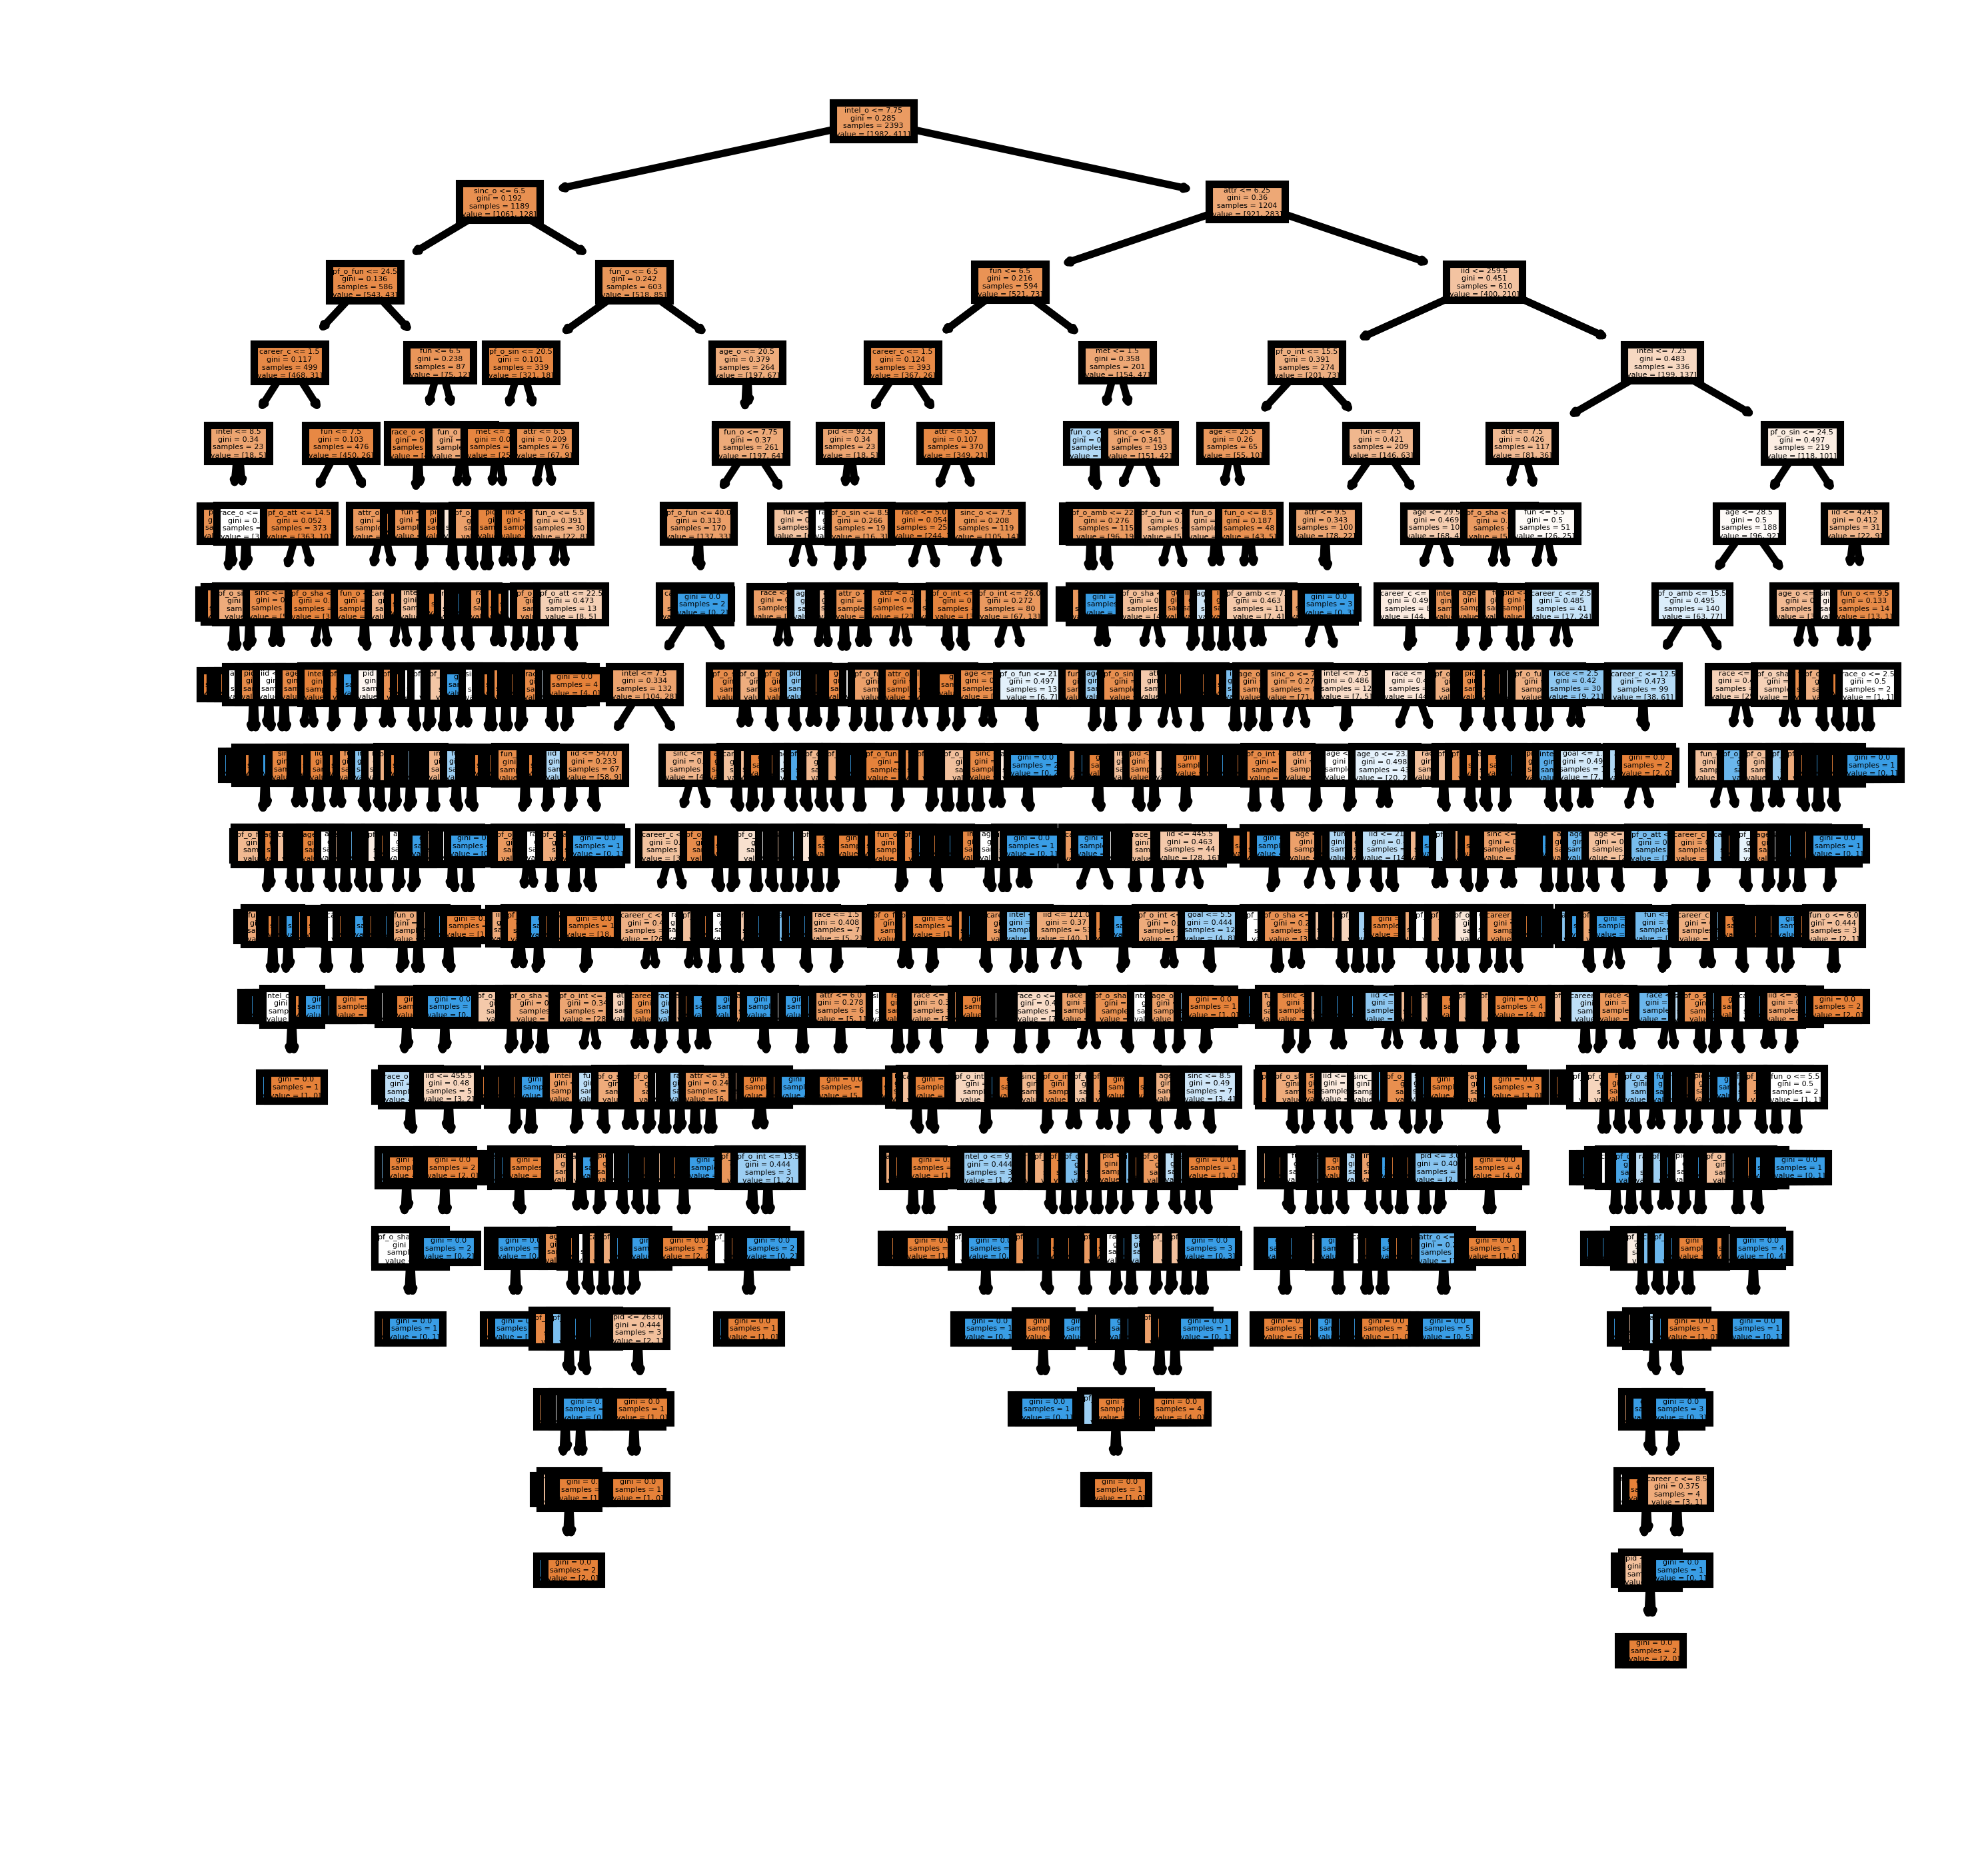

In [69]:
# View Random Forest Graphics (zoom into png file for better rendering)
from sklearn.tree import export_graphviz

fn=X_train2.columns
cn=['match']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(clf.estimators_[0],
               feature_names = fn, 
               #class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')

In [74]:
#Random Forest vs Logistics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#RMSE 
from sklearn.metrics import mean_squared_error

print("MSE Random Forest:", mean_squared_error(y_test2, rfc))
print("Accuracy Random Forest:", accuracy_score(y_test2, rfc))
print("Precision Random Forest:", precision_score(y_test2, rfc))
print("Recall Random Forest:", recall_score(y_test2, rfc))

print("MSE Logistics:", mean_squared_error(y_test2, logr_pred))
print("Accuracy Logistics:", accuracy_score(y_test2, logr_pred))
print("Precision Logistics:", precision_score(y_test2, logr_pred))
print("Recall Logistics:", recall_score(y_test2, logr_pred))

MSE Random Forest: 0.13533834586466165
Accuracy Random Forest: 0.8646616541353384
Precision Random Forest: 0.7101449275362319
Recall Random Forest: 0.35766423357664234
MSE Logistics: 0.15664160401002505
Accuracy Logistics: 0.843358395989975
Precision Logistics: 0.6111111111111112
Recall Logistics: 0.24087591240875914


In [38]:
#Support Vector Machine (SVM)
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
import operator

# Scale
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
scores = {}
for this_kernel in ['linear', 'rbf']:
    for this_gamma in [0.1, 0.5, 1, 5, 10]:
        for this_C in [0.1, 0.5, 1, 5, 10]:
            clf = SVC(kernel=this_kernel, gamma=this_gamma, C=this_C)
            scores[(this_kernel, this_gamma, this_C)] = np.mean(cross_val_score(clf, X_train_scaled, y_train, cv=5, scoring='f1_micro'))
            
best_kernel, best_gamma, best_C = max(scores.items(), key=operator.itemgetter(1))[0]

#Training Prediction
the_svc= SVC(kernel=best_kernel, gamma=best_gamma, C=best_C).fit(X_train_scaled, y_train)
the_pred=the_svc.predict(X_test_scaled)
print(f1_score(y_test, the_pred,average = 'weighted'))

# Scale
#Validation
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train2)
X_test_scaled = scaler.transform(X_test2)

#Testing Prediction
clf2 = SVC(kernel=best_kernel, gamma=best_gamma, C=best_C).fit(X_train_scaled, y_train2)
pclf2=clf2.predict(X_test_scaled)
f1_score_svc= f1_score(y_test2, pclf2,average = 'weighted')
print(f1_score_svc)

0.785341271186521
0.7977829339484064


In [39]:
from sklearn.tree import DecisionTreeClassifier
#Standardize/normalize the data (mean=0, sd=1)
scaler = StandardScaler()
standardized_X_train = scaler.fit_transform(X_train)
standardized_X_test = scaler.transform(X_test)

##Regularization Parameters
criterion_dtc = ['gini', 'entropy']
splitter_dtc= ['best', 'random']
max_depth_dtc = [1,2,4,6,10,12]
min_samples_split = [2,4,6]
max_features = ['auto', 'sqrt', 'log2']
tuned_parameters = [{'criterion': criterion_dtc, 
                     'max_depth': max_depth_dtc, 
                     'splitter':splitter_dtc,
                     'min_samples_split':min_samples_split,
                     'max_features':max_features}]
n_folds = 5

#Grid searc Decision Tree
dtc_obj = DecisionTreeClassifier()
grid_search = GridSearchCV(dtc_obj, tuned_parameters, cv=n_folds, refit=False, scoring='f1_micro')

#Fit grid search
dtc_best_model = grid_search.fit(standardized_X_train, y_train)

#View best hyperparameters
print(dtc_best_model.best_params_)

{'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_split': 6, 'splitter': 'random'}


In [41]:
#Decision Tree best param GS
#Standardize/normalize the data (mean=0, sd=1)
my_scaler = StandardScaler()
standardized_X_train_dtc = my_scaler.fit_transform(X_train2)
standardized_X_test_dtc = my_scaler.transform(X_test2)

#Best Model Logistics: fit, prediction
dtc = DecisionTreeClassifier(criterion= 'gini',
                             max_depth= 4, 
                             max_features= 'sqrt', 
                             min_samples_split= 6,
                             splitter= 'random',
                             random_state=0).fit(standardized_X_train_dtc, y_train2)
my_dtc = dtc.predict(standardized_X_test_dtc)

f1_dtc=f1_score(y_test2, my_dtc, average = 'weighted')
print(f1_dtc)

0.7505415354699292


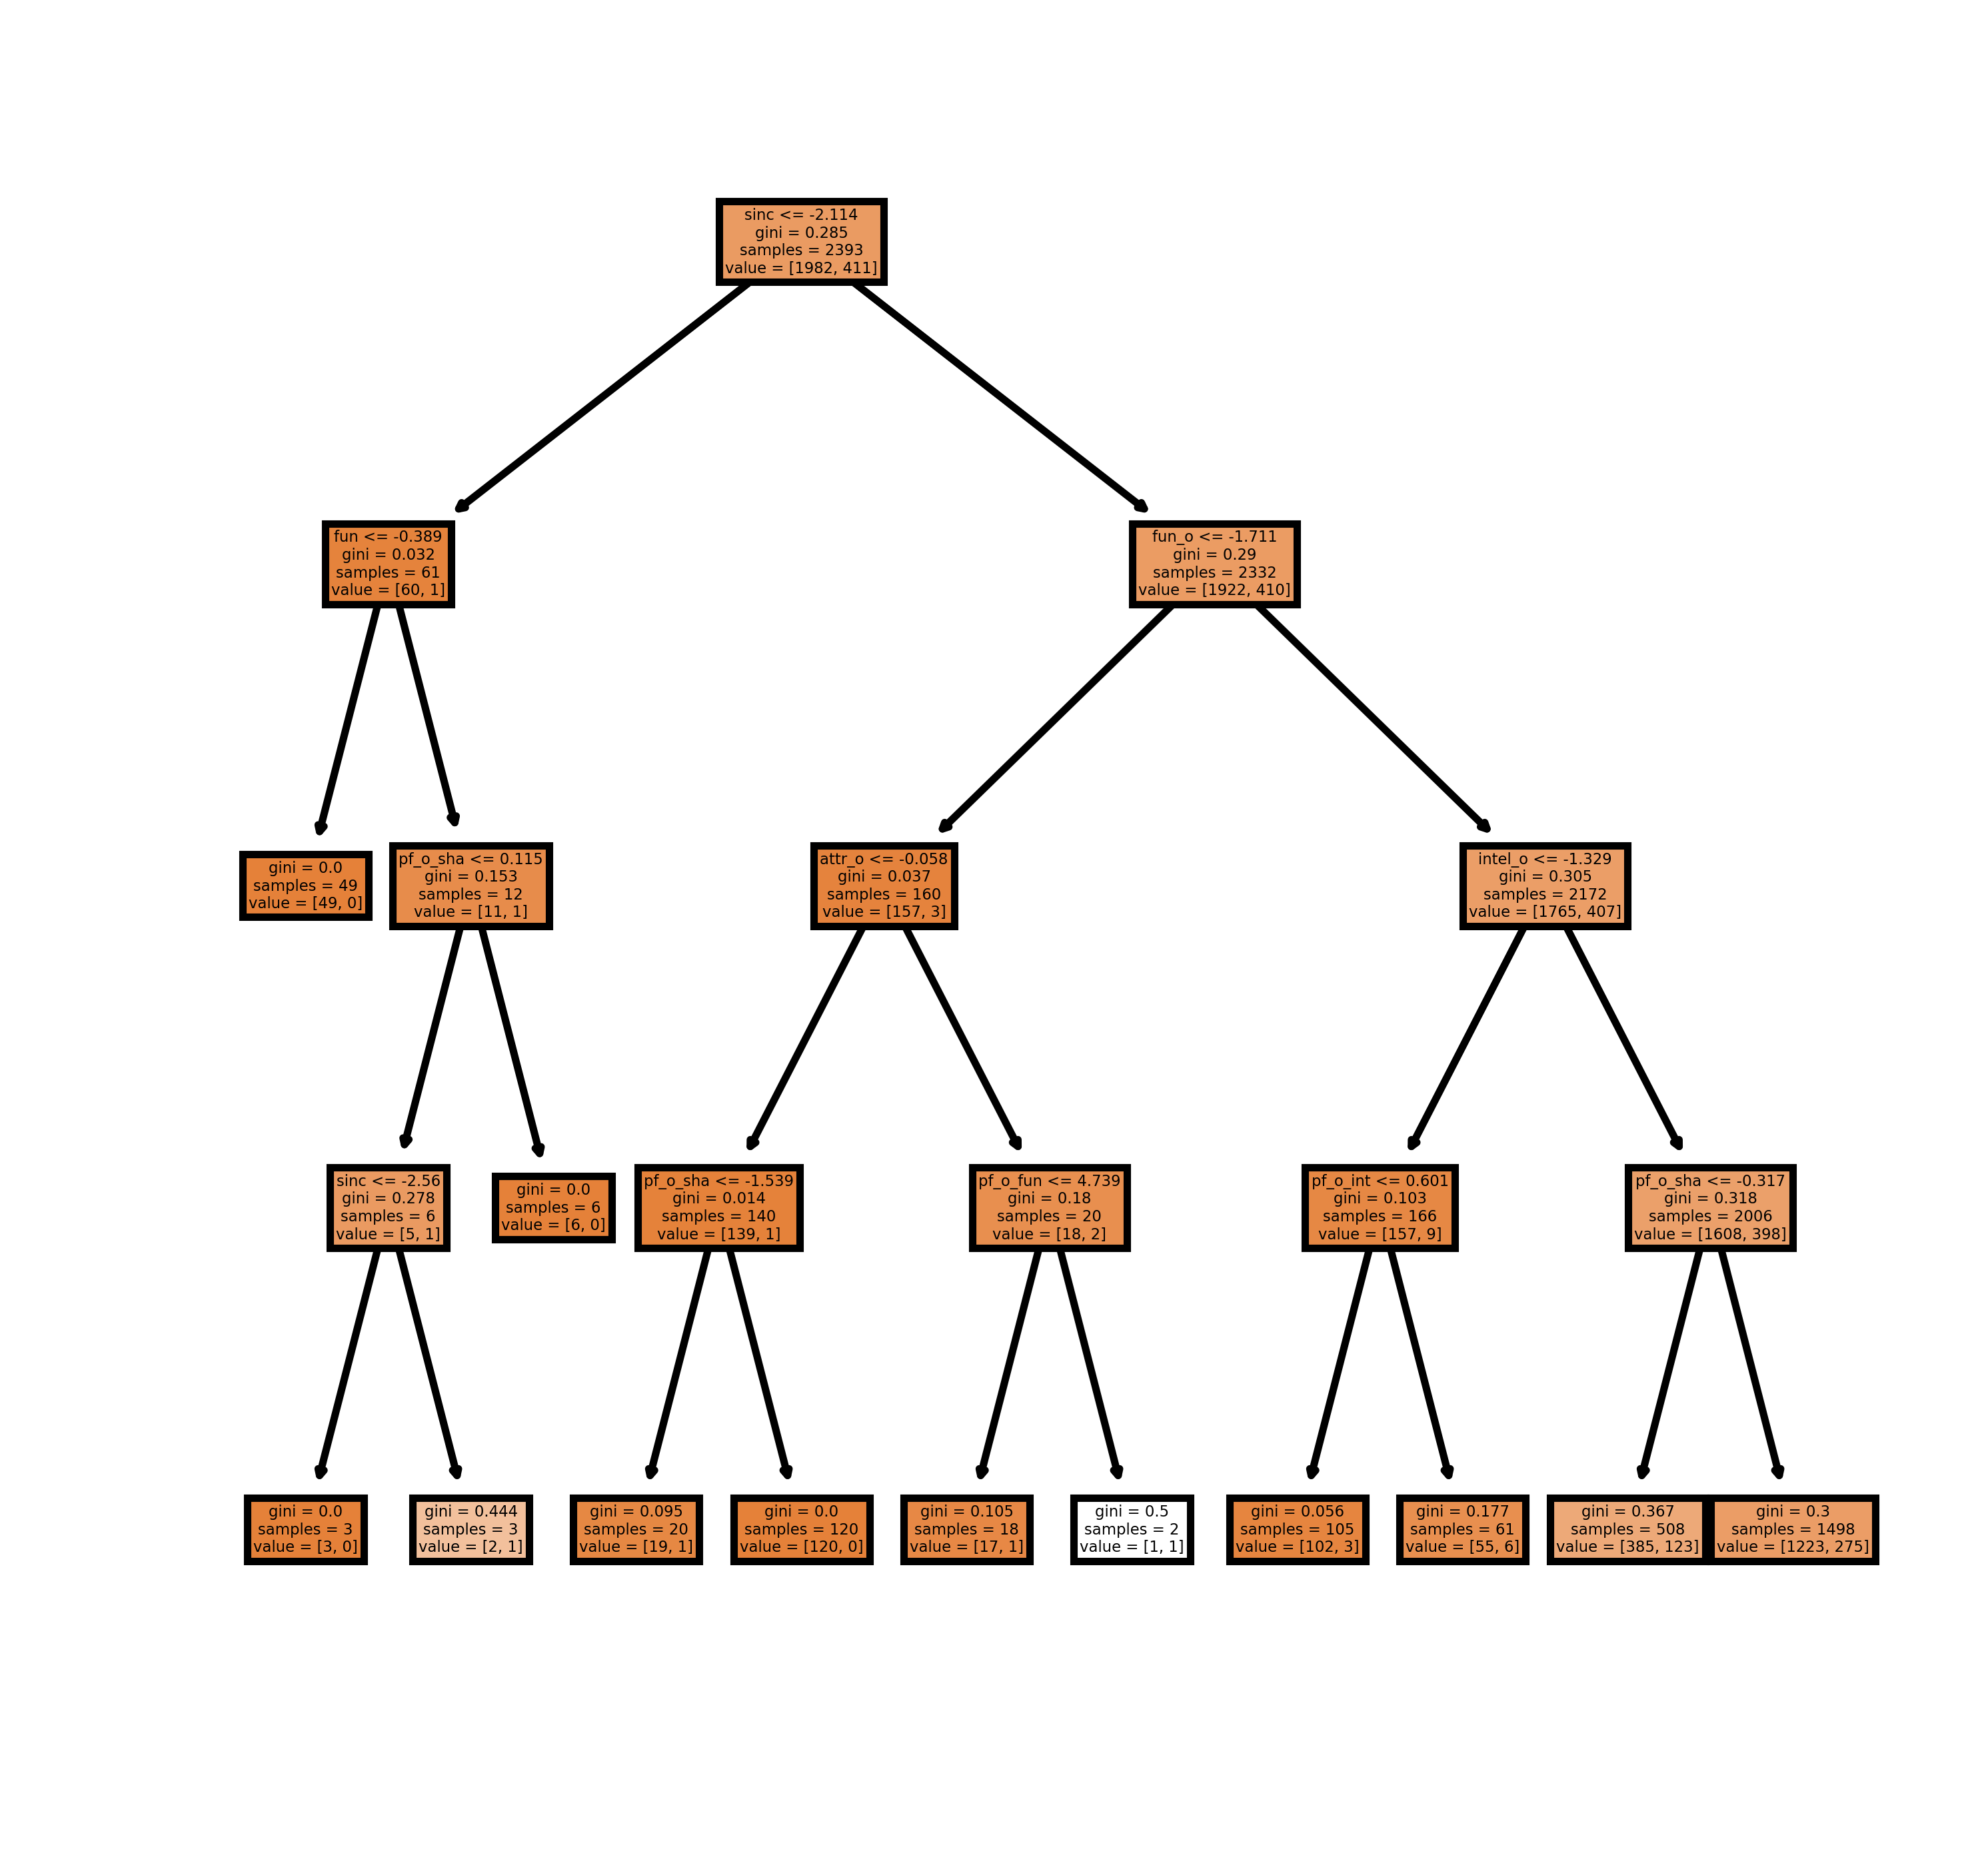

In [68]:
#Decision Tree Graph
from sklearn import tree
#tree.plot_tree(dtc) 
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(dtc,
               feature_names = X_test2.columns, 
               #class_names=cn,
               filled = True);
fig.savefig('decision_tree.png')

In [272]:
testML.head()

,gender,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,attr_o,sinc_o,intel_o,fun_o,met_o,age,field,race,imprace,imprelig,from,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,attr3_1,sinc3_1,fun3_1,intel3_1,attr,sinc,intel,fun,met,iid,pid,match
0,0,0,27.0,2,35.0,20.0,20.0,20.0,0.0,5.0,6.0,8.0,8.0,8.0,2.0,21.0,Law,4,2.0,4.0,Chicago,2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,15.0,20.0,20.0,15.0,15.0,6.0,8.0,8.0,8.0,6.0,9.0,7.0,7.0,2.0,246,449,NaN
1,0,0,22.0,2,60.0,0.0,0.0,40.0,0.0,0.0,7.0,8.0,10.0,7.0,2.0,21.0,Law,4,2.0,4.0,Chicago,2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,15.0,20.0,20.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,8.0,7.0,8.0,1.0,246,19,NaN
2,0,1,22.0,4,19.0,18.0,19.0,18.0,14.0,12.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,4,2.0,4.0,Chicago,2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,15.0,20.0,20.0,15.0,15.0,6.0,8.0,8.0,8.0,5.0,8.0,9.0,8.0,1.0,246,68,NaN
3,0,0,23.0,2,30.0,5.0,15.0,40.0,5.0,5.0,7.0,8.0,9.0,8.0,2.0,21.0,Law,4,2.0,4.0,Chicago,2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,15.0,20.0,20.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,6.0,8.0,7.0,2.0,246,45,NaN
4,0,0,24.0,3,30.0,10.0,20.0,10.0,10.0,20.0,8.0,7.0,9.0,6.0,2.0,21.0,Law,4,2.0,4.0,Chicago,2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,15.0,20.0,20.0,15.0,15.0,6.0,8.0,8.0,8.0,5.0,6.0,7.0,7.0,2.0,246,221,NaN


In [273]:
#Test ML Results
#The model will be a random forest with the hyperparameters choosed earlier with grid search. 

#Train Data
X_reduced = trainML[['age','age_o', 'race_o', 
                     'pf_o_att','pf_o_sin','pf_o_int','pf_o_fun','pf_o_amb','pf_o_sha',
                     'attr_o','sinc_o', 'intel_o','fun_o',
                     'goal','career_c',
                     'attr','sinc','intel','fun','met',
                     'iid','pid', 'race']]
y= trainML['match']

X_test_reduced = testML[['age','age_o', 'race_o', 
                     'pf_o_att','pf_o_sin','pf_o_int','pf_o_fun','pf_o_amb','pf_o_sha',
                     'attr_o','sinc_o', 'intel_o','fun_o',
                     'goal','career_c',
                     'attr','sinc','intel','fun','met',
                     'iid','pid', 'race']]

**TestML Dataset Update Strategey**

- Age
    - fill nan's witht values from a Gaussian distribution with mean and sigma similar to those of age distribution
    
 - Partner Preference attributes
     - Fill nan's with zeros
     - If total sum of pf attributes > 100, simply replace each value with the mean of that category

- Partner Attributes 
     - Fill nan's with -1
     - If total sum of  attributes > 10 or < 0 (nans) , simply replace each value with the mean of that category
     
- Subject Attributes
     - Fill nan's with -1
     - If total sum of  attributes > 10 or < 0 (nans) , simply replace each value with the mean of that category

- Career
     - If only career_c is nan (replace nan with the equivalent carrer encoding from career)
     - If both nan, replace nan with other encoding 

- Goal
     - Impute goal by filling missing values by previous values

- Met
     - Impute met by filling missing values by previous values
     - Change 3's to 2 
     - Change 0's to 1

In [274]:
#Impute missing values 
import warnings
warnings.filterwarnings("ignore")
#Given age follows a normal distribution, I will simply replace all missing values with a random Gaussian age number 
# Age
age = X_test_reduced['age'].to_frame(name='age')

#Mean & STD
mu = np.mean(age)
sigma = np.std(age)

#Fill in nans wirh -1 (so as to recognize these values in if statement & replace them with random Normal value)
age= age.fillna(-1)

def calculate_age(row):
    i=row['age']
    if(i == -1):
        age = np.random.normal(mu, sigma, 1).tolist()[0]
        return age
    else:
        return i

age['age'] = age.apply(calculate_age, axis=1)

#Update Dataset
X_test_reduced['age'] = age['age']

In [275]:
age_o = X_test_reduced['age_o'].to_frame(name='age_o')

#Mean & STD
mu = np.mean(age_o)
sigma = np.std(age_o)

#Fill in nans wirh -1 (so as to recognize these values in if statement & replace them with random Normal value)
age_o= age_o.fillna(-1)

def calculate_age(row):
    i=row['age_o']
    if(i == -1):
        age = np.random.normal(mu, sigma, 1).tolist()[0]
        return age
    else:
        return i

age_o['age'] = age_o.apply(calculate_age, axis=1)

#Update Dataset
X_test_reduced['age_o'] = age_o['age']

In [276]:
#For Attributes, simply replace nan's with zero & ratings > 100 replace scores with mean scores
#Replace NANS WITH ZERO
preferences = ['pf_o_att','pf_o_sin','pf_o_int','pf_o_fun','pf_o_amb','pf_o_sha']
X_test_reduced[preferences] = X_test_reduced[preferences].fillna(value=0)

#If total sum of pf attributes > 100, simply replace each value with the mean of that category
for x, y in X_test_reduced.iterrows():
    z=y[['pf_o_att','pf_o_sin','pf_o_int','pf_o_fun','pf_o_amb','pf_o_sha']].sum()
    if(z>100.0):
        X_test_reduced.loc[x,['pf_o_att','pf_o_sin','pf_o_int','pf_o_fun','pf_o_amb','pf_o_sha']]=[25.670180,16.653736,20.662375,17.467612 ,8.478953,10.663476] 

In [277]:
#zeba
#Fill Nan's with zeros
preferences = ['attr_o', 'sinc_o','intel_o','fun_o']
X_test_reduced[preferences] = X_test_reduced[preferences].fillna(value=-1)

#If total sum of  attributes > 10 or < 0 (nans) , simply replace each value with the mean of that category
for x, y in X_test_reduced.iterrows():
    for p in preferences:
        z=y[p]
        if((z>10.0) or (z<0)):
            if(p=='attr_o'):  
                X_test_reduced.loc[x,[p]]=6.019131 
            elif(p=='sinc_o'):
                X_test_reduced.loc[x,[p]]=7.024107
            elif(p=='intel_o'):
                X_test_reduced.loc[x,[p]]= 7.223034
            elif(p=='fun_o'):
                X_test_reduced.loc[x,[p]]= 6.335021

In [278]:
#Fill Nan's with zeros
preferences = ['attr','sinc','intel','fun']
X_test_reduced[preferences] = X_test_reduced[preferences].fillna(value=-1)

#If total sum of  attributes > 10 or < 0 (nans) , simply replace each value with the mean of that category
for x, y in X_test_reduced.iterrows():
    for p in preferences:
        z=y[p]
        if((z>10.0) or (z<0)):
            if(p=='attr'):  
                X_test_reduced.loc[x,[p]]=6.018959
            elif(p=='sinc'):
                X_test_reduced.loc[x,[p]]=7.024107
            elif(p=='intel'):
                X_test_reduced.loc[x,[p]]= 7.223034
            elif(p=='fun'):
                X_test_reduced.loc[x,[p]]= 6.334672

In [279]:
aa= testML[['career','career_c']]

#Iterate over all rows 
for x, y in aa.iterrows():
    a,b = y
    #Other
    if(pd.isnull(a)):
         aa.loc[x,'career_c']= 0
    
    #If only career_c is nan (replace nan with the equivalent carrer encoding)
    elif(np.isnan(b)):
        if(a=='lawyer' or a=='law'):
            aa.loc[x,'career_c']= 1
        elif(a=='tech professional'):
            aa.loc[x,'career_c']= 6   
        elif(a=='Economist'):
            aa.loc[x,'career_c']= 7
X_test_reduced['career_c']= aa['career_c']

In [280]:
#Goal
#I will simply impute goal/met by filling missing values by previous values
X_test_reduced['goal'].fillna(method='ffill', inplace=True)

#Met
#NUll values with impute 
X_test_reduced['met'].fillna(method='ffill', inplace=True)

#Change 3's to 2 
X_test_reduced.loc[(X_test_reduced.met > 2),'met']= 2

#Change 0's to 1
X_test_reduced.loc[(X_test_reduced.met <1),'met']= 1

In [289]:
from sklearn.ensemble import RandomForestClassifier 

#Model
clf = RandomForestClassifier(random_state=0,
                             n_estimators=200,
                            max_features= 'sqrt',        
                           max_depth=50,
                           min_samples_split=2,
                           min_samples_leaf= 1,
                           bootstrap= False).fit(X_reduced, y)
rfc_results= clf.predict(X_test_reduced)
testML['match']=rfc_results

In [512]:
testML.to_csv("TESTml.csv")
testML.head()

,gender,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,attr_o,sinc_o,intel_o,fun_o,met_o,age,field,race,imprace,imprelig,from,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,attr3_1,sinc3_1,fun3_1,intel3_1,attr,sinc,intel,fun,met,iid,pid,match
0,0,0,27.0,2,35.0,20.0,20.0,20.0,0.0,5.0,6.0,8.0,8.0,8.0,2.0,21.0,Law,4,2.0,4.0,Chicago,2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,15.0,20.0,20.0,15.0,15.0,6.0,8.0,8.0,8.0,6.0,9.0,7.0,7.0,2.0,246,449,0
1,0,0,22.0,2,60.0,0.0,0.0,40.0,0.0,0.0,7.0,8.0,10.0,7.0,2.0,21.0,Law,4,2.0,4.0,Chicago,2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,15.0,20.0,20.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,8.0,7.0,8.0,1.0,246,19,0
2,0,1,22.0,4,19.0,18.0,19.0,18.0,14.0,12.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,4,2.0,4.0,Chicago,2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,15.0,20.0,20.0,15.0,15.0,6.0,8.0,8.0,8.0,5.0,8.0,9.0,8.0,1.0,246,68,1
3,0,0,23.0,2,30.0,5.0,15.0,40.0,5.0,5.0,7.0,8.0,9.0,8.0,2.0,21.0,Law,4,2.0,4.0,Chicago,2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,15.0,20.0,20.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,6.0,8.0,7.0,2.0,246,45,0
4,0,0,24.0,3,30.0,10.0,20.0,10.0,10.0,20.0,8.0,7.0,9.0,6.0,2.0,21.0,Law,4,2.0,4.0,Chicago,2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,15.0,20.0,20.0,15.0,15.0,6.0,8.0,8.0,8.0,5.0,6.0,7.0,7.0,2.0,246,221,0


# Part 3

**Model Selection & Procedure**

> In total I have run 10 different models and these ones being: SVD, SVD++, NMF, SlopeOne,K-NN, Centered K-NN, K-NN Baseline, Co-Clustering, Baseline, Random. This initial phase was needed, so as to get a high level understanding of the best/worst models with our data. The intention for doing phase one is to reduce the number of models to consider (less incorrect models , less wasted time). 

> The high level procedure more, or less was the same for most models
    - Read data
    - Split data into training/testing
    - Run each defualt (untuned) model twice
        - Kfold, n_splits=5
    - Find out average absolute error testing error

> The results from running the *defaults* models sorted according to best MAE

Model                  | Mean Absolute Error        |
---------------------- | ---------------------------|
SVD++                  | 0.1291       
K-NN Baseline          | 0.1403
K-NN with Means        | 0.1407
KNNWithZScore          | 0.1445
SVD                    | 0.1552   
Slope One              | 0.1609  
Baseline Only          | 0.1841
K-NN Basic             | 0.2667
Co-Clustering          | 0.4796
NMF                    | 0.9738 
Normal Predictor       | 1.2070


**Best Model Selection & Procedure**

> At this stage I picked the top 4 untuned  models: SVD++, SVD, K-NN Baseline, K-NNwithMeans, so as to reduce the number of models to focus on. At this point, I performed hyperparameterization through grid search with the intention to tune each model to its best capability. Finally, I picked the tuned model with best MAE. 

> The high level procedure of performing model tuninng with grid search was found using surprise documentation implementaiton: https://surprise.readthedocs.io/en/stable/FAQ.html#unbiased-estimate-after-tuning
    - Read in data
    - Split data into A & B sets (train/test , 90%/10%) 
    - Grid search on possible parameters ranges (documentation was consulted before picking param ranges)
    - Get best param based on MAE
    - Fit model to train
    - Get unbiased test error based on MAE
    
> The results from running the top 5 tuned model sorted according to best MAE

Model                  | Mean Absolute Error        |
---------------------- | ---------------------------|
SVD                    | 0.0566
SVD++                  | 0.1308
K-NN Baseline          | 0.1460
K-NN with Means        | 0.1464
KNNWithZScore          | 0.1536

> The final model that was chosen to run on the testRec is the SVD algorithm. The main reason for this choise is the extreme low error in comparison with the others models (mae). Even, if all models have been trained on same train/test datasets & have been tuned with same procedures, the SVD algo is quite superior to all other options. Hence, my final choice is SVD with hyperparametrs **SVD(n_factors=20, n_epochs=60, lr_all= 0.02)**

In [299]:
#To get an idea of the dataset ranges 
trainRec.describe()

,pid,iid,rate
count,38340.000000,38340.000000,38340.000000
mean,390.040454,389.799035,6.390028
std,94.255419,94.648498,1.076655
min,234.000000,234.000000,1.620000
25%,305.000000,304.000000,5.720000
50%,388.000000,387.000000,6.400000
75%,473.000000,473.000000,7.100000
max,552.000000,552.000000,11.000000


In [326]:
from surprise.model_selection import cross_validate, KFold,train_test_split,GridSearchCV
from surprise import accuracy, Dataset, Reader,SVD, SVDpp,NMF,SlopeOne, KNNBasic,KNNWithMeans,KNNBaseline,CoClustering,BaselineOnly, NormalPredictor,KNNWithZScore


#Read in Custom Data
df = trainRec

# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(1, 10))

# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(df[['pid', 'iid', 'rate']], reader)

#CV function 
def cv(model):
    error = []
    # Define a cross-validation iterator
    kf = KFold(n_splits=5)
    algo = model 
    for trainset, testset in kf.split(data):
        # train and test algorithm.
        algo.fit(trainset)
        predictions = algo.test(testset)
        # Compute and print Root Mean Squared Error
        error.append(accuracy.mae(predictions, verbose=False))
    return np.mean(error)

In [306]:
print('SVD MAE: ',cv(SVD()))

SVD MAE:  0.15269037292381046


In [305]:
print('SVD++ MAE: ',cv(SVDpp()))

SVD++ MAE:  0.12951860698264048


In [311]:
print('NMF MAE: ',cv(NMF()))

NMF MAE:  0.9846518230271059


In [312]:
print('SlopeOne MAE: ',cv(SlopeOne()))

SlopeOne MAE:  0.16112798827361124


In [313]:
print('KNNBasic MAE: ',cv(KNNBasic()))

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
KNNBasic MAE:  0.2666587583728314


In [314]:
print('KNNWithMeans MAE: ',cv(KNNWithMeans()))

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
KNNWithMeans MAE:  0.14074923371881104


In [315]:
print('KNNBaseline MAE: ',cv(KNNBaseline()))

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
KNNBaseline MAE:  0.14017300664604776


In [327]:
print('KNNWithZScore MAE: ',cv(KNNWithZScore()))

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
KNNWithZScore MAE:  0.14445558048957063


In [317]:
print('BaselineOnly MAE: ',cv(BaselineOnly()))

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
BaselineOnly MAE:  0.18411399068202192


In [316]:
print('CoClustering MAE: ',cv(CoClustering()))

CoClustering MAE:  0.47851375619085756


In [321]:
print('NormalPredictor MAE: ',cv(NormalPredictor()))

NormalPredictor MAE:  1.2077455104320465


In [330]:
#---------------------------------GRID SEARCH--------------------------------
def gs(model, param_grid):
    import random
    random.seed(10)
    # Load the full dataset.
    raw_ratings = data.raw_ratings

    # shuffle ratings if you want
    random.shuffle(raw_ratings)

    # A = 90% of the data, B = 10% of the data
    threshold = int(.9 * len(raw_ratings))
    A_raw_ratings = raw_ratings[:threshold]
    B_raw_ratings = raw_ratings[threshold:]

    data.raw_ratings = A_raw_ratings  # data is now the set A

    # Select your best algo with grid search.
    print('Grid Search...')
    
    grid_search = GridSearchCV(model, param_grid, measures=['mae'], cv=3)
    grid_search.fit(data)

    # combination of parameters that gave the best RMSE score
    print(grid_search.best_params['mae'])

    algo = grid_search.best_estimator['mae']

    # retrain on the whole set A
    trainset = data.build_full_trainset()
    algo.fit(trainset)

    # Compute unbiased accuracy on B
    testset = data.construct_testset(B_raw_ratings)  # testset is now the set B
    predictions = algo.test(testset)
    print('Unbiased accuracy on B,', end=' ')
    accuracy.mae(predictions) 

In [331]:
#SVD with Grid Search Parameters 
param_grid = {'n_factors':  [0, 10, 20, 30 , 40 ,50] ,
              'n_epochs': [10, 20, 30, 50, 60], 
              'lr_all': [0.008, 0.009, 0.01, 0.02]}
gs(SVD,param_grid)

Grid Search...
{'n_factors': 20, 'n_epochs': 60, 'lr_all': 0.02}
Unbiased accuracy on B, MAE:  0.0367


In [336]:
#Best SVD Model
print('SVD MAE: ',cv(SVD(n_factors=20, n_epochs=60, lr_all= 0.02)))

SVD MAE:  0.056577335433017274


In [335]:
#SVD++ with Grid Search Parameters 
param_grid = {'n_factors':  [ 20, 30 , 40] ,
              'n_epochs': [20, 30], 
                'lr_all': [0.008]}
gs(SVDpp, param_grid)

Grid Search...
{'n_factors': 30, 'n_epochs': 30, 'lr_all': 0.008}
Unbiased accuracy on B, MAE:  0.1088


In [340]:
#Best SVD++ Model
print('SVD++ MAE: ',cv(SVDpp(n_factors=30, n_epochs=30, lr_all= 0.008)))

SVD++ MAE:  0.13076162531820595


In [332]:
#K-NNwithMeans with Grid Search Parameters 
param_grid = {'k':  [20, 30 , 40] ,
              'min_k': [1, 2, 3]}
gs(KNNWithMeans,param_grid)

Grid Search...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix.

In [337]:
#Best K-NNwithMeans Model
print('K-NNwithMeans MAE: ',cv(KNNWithMeans(k=20,min_k=1)))

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
K-NNwithMeans MAE:  0.14642431195265243


In [333]:
#KNNBaseline with Grid Search Parameters 
param_grid = {'k':  [20, 30 , 40 ] ,
              'min_k': [1, 2, 3]}

gs(KNNBaseline,param_grid)

Grid Search...
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd 

In [338]:
#Best KNNBaseline Model
print('KNN Baseline MAE: ',cv(KNNBaseline(k=20,min_k=1)))

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
K-NNwithMeans MAE:  0.145953252578022


In [334]:
#KNNWithZScore with Grid Search Parameters 
param_grid = {'k':  [20, 30 , 40 ] ,
              'min_k': [1, 2, 3]}
gs(KNNWithZScore,param_grid)

Grid Search...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix.

In [339]:
#Best K-NNwithMeans Model
print('KNNWithZScore MAE: ',cv(KNNWithZScore(k=20,min_k=1)))

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
K-NNwithMeans MAE:  0.15359372151829953


In [345]:
#TestRec
#Read in Custom Data
df = trainRec
df2= testRec

# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(1, 10))

#Train data
train_data = Dataset.load_from_df(df[['pid', 'iid', 'rate']], reader)
trainset = train_data.build_full_trainset()


#Test Set
test_data = Dataset.load_from_df(df2[['pid', 'iid', 'rate']], reader)
testset = test_data.construct_testset(test_data.raw_ratings)

#Model 
algo = SVD(n_factors=20, n_epochs=60, lr_all= 0.02) 

# train 
algo.fit(trainset)

#Predict
predictions = algo.test(test_data)

In [399]:
rate= []
for x in predictions:
    rate.append(x[3])
testRec['rate']=rate

#Alternative way
# for _, row in testRec.iterrows():
#     algo.predict(row.pid, row.iid)

In [515]:
#Actual rating
testRec.to_csv("TESTrec.csv")
testRec.head()

,pid,iid,rate
0,234,234,7.362148
1,234,236,7.261703
2,234,239,6.363147
3,234,243,7.107184
4,234,244,6.882629
